# **Target Case Study**

### **Customer Sales Analysis (SQL)**

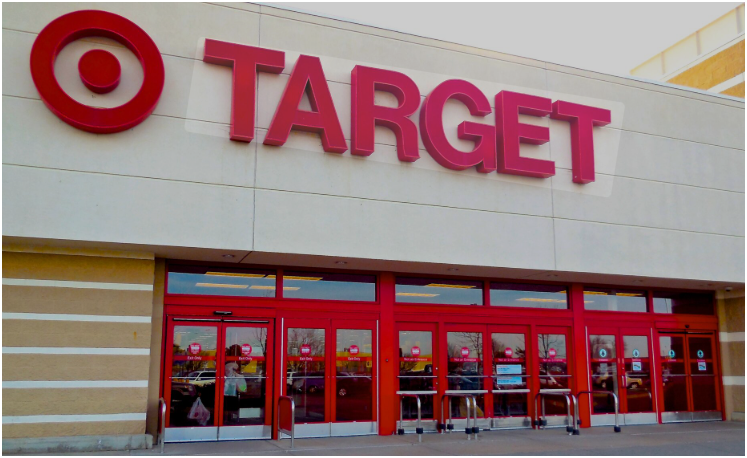

# **Problem Statement:**


### **Assuming you are a data analyst/ scientist at Target, you have been assigned the task of analyzing the given dataset to extract valuable insights and provide actionable recommendations.**










---



# **Context**


* **Target is a globally renowned brand and a prominent retailer in the United States. Target makes itself a preferred shopping destination by offering outstanding value, inspiration, innovation and an exceptional guest experience that no other retailer can deliver.**

* **This particular business case focuses on the operations of Target in Brazil and provides insightful information about 100,000 orders placed between 2016 and 2018. The dataset offers a comprehensive view of various dimensions including the order status, price, payment and freight performance, customer location, product attributes, and customer reviews.**

* **By analyzing this extensive dataset, it becomes possible to gain valuable insights into Target's operations in Brazil. The information can shed light on various aspects of the business, such as order processing, pricing strategies, payment and shipping efficiency, customer demographics, product characteristics, and customer satisfaction levels.**


# **Dataset:**

### **The data is available in 8 different csv files:**

* **customers.csv**
* **geolocation.csv**
* **order_items.csv**
* **payments.csv**
* **reviews.csv**
* **orders.csv**
* **products.csv**
* **sellers.csv**


### **The column description for these csv files is given below -**

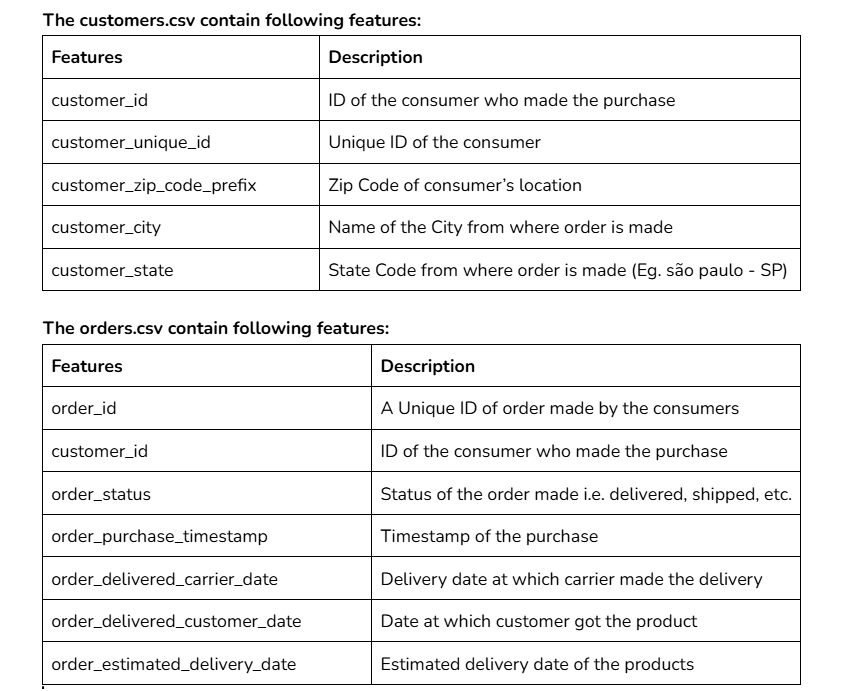

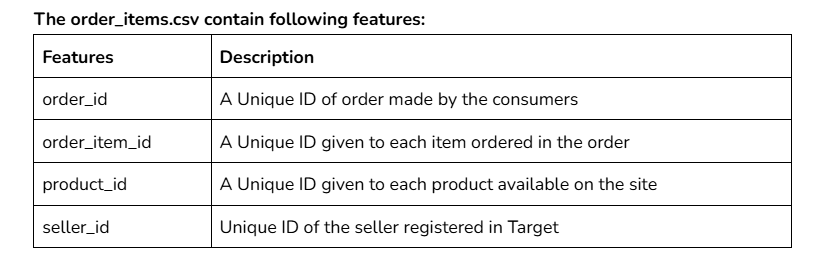

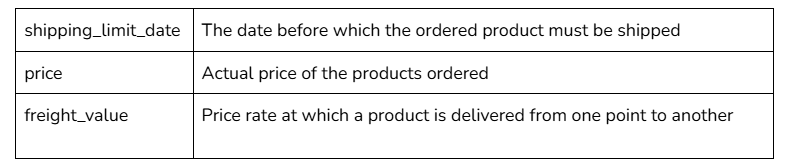

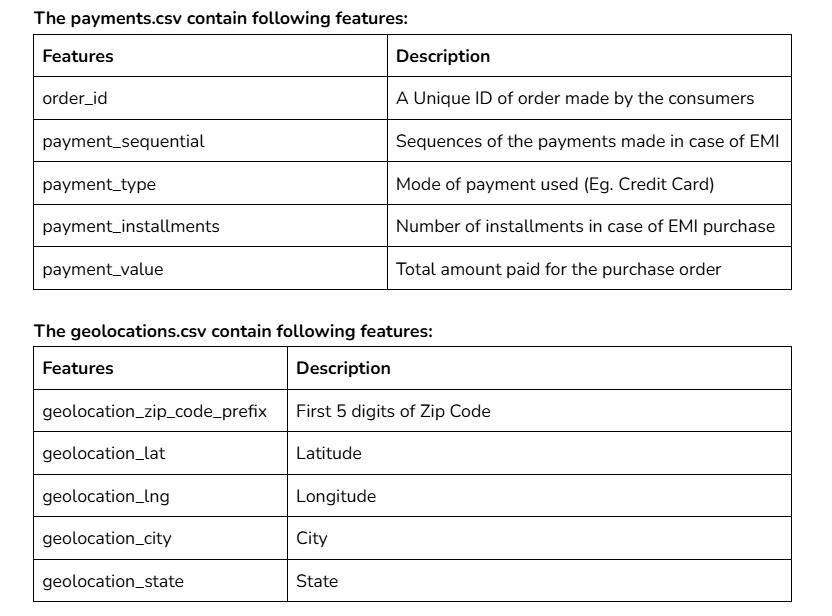

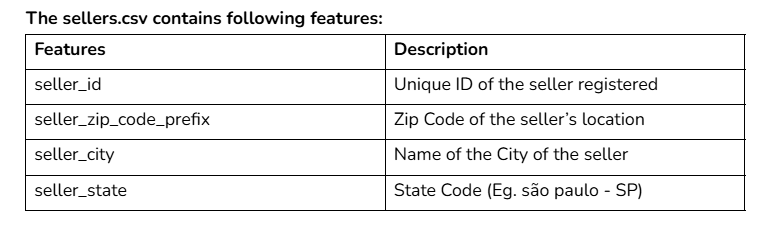

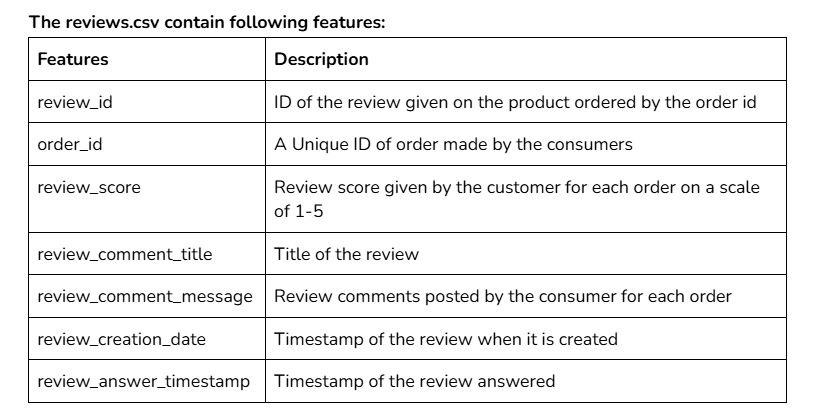

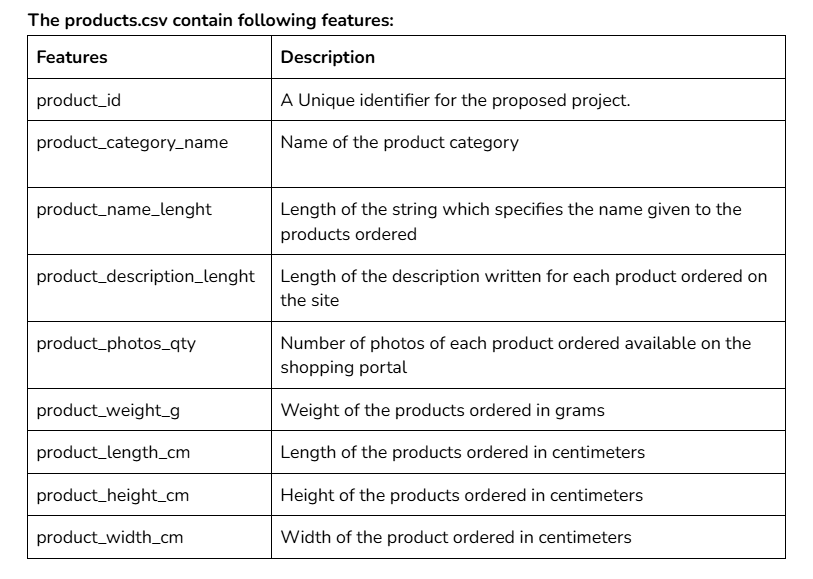

# **Dataset schema:**

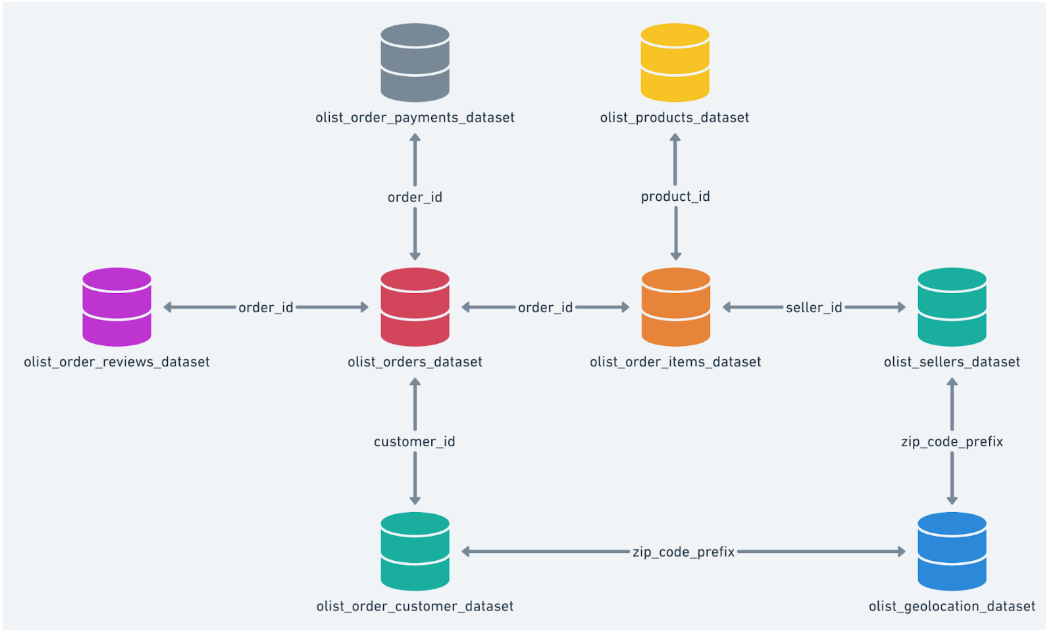

## **Problem Statement Solution :**

### **What does ‘good’ look like?**


### **1. Import the dataset and do usual exploratory analysis steps like checking the structure & characteristics of the dataset:**




 **A. Data type of all columns in the “customers” table**.




```
select column_name, data_type
from `target-472006.data.INFORMATION_SCHEMA.COLUMNS`
where table_name = 'customers' ;

```

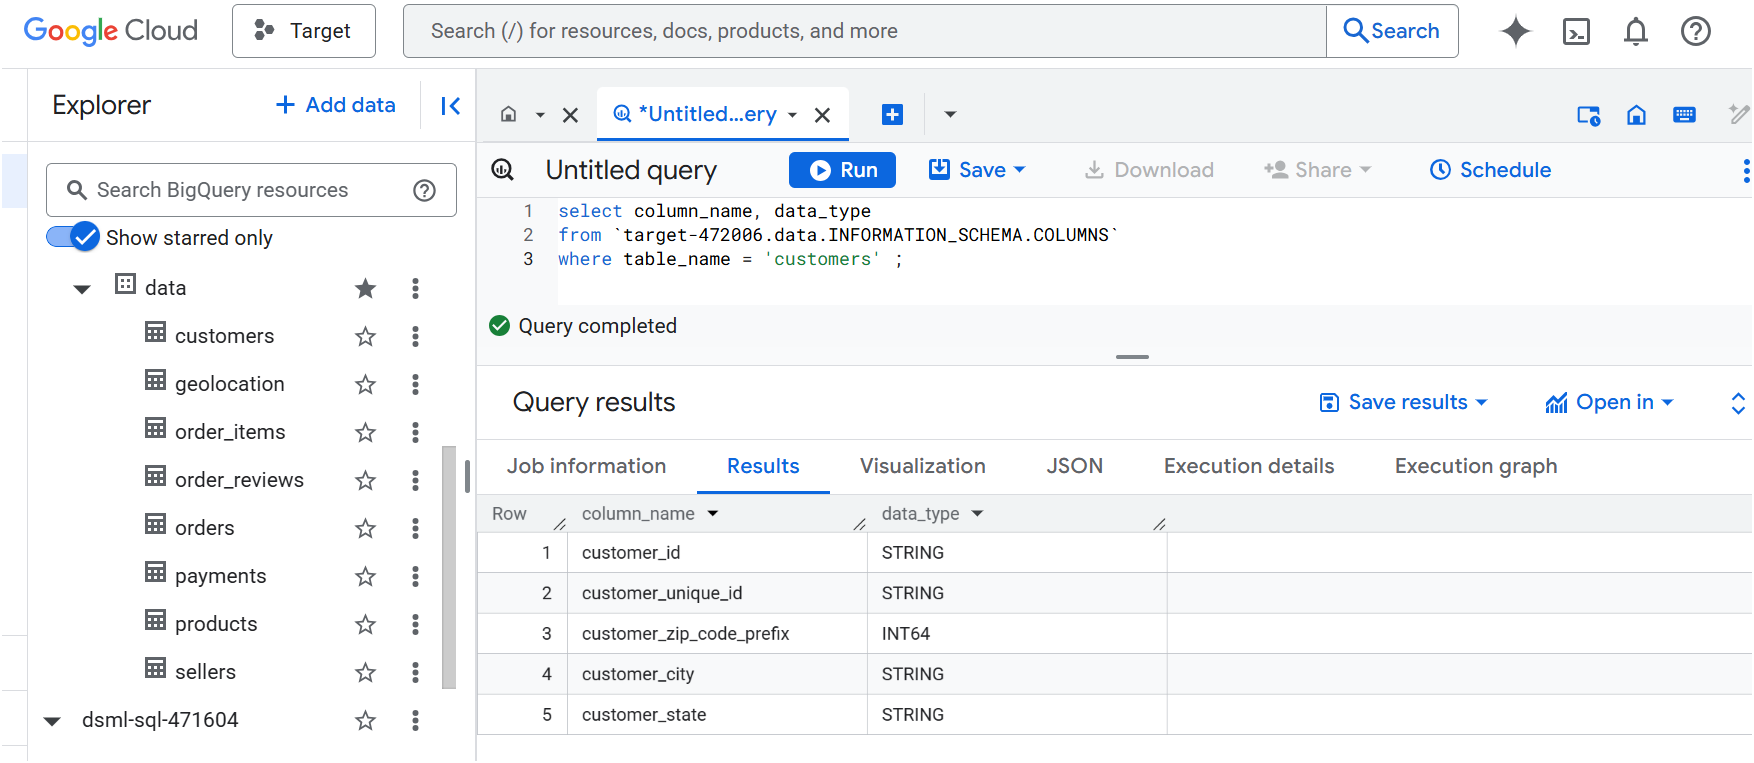



**Insights:**

* The `customers` table mostly contains **string fields** (IDs, city, state) along with a **numeric ZIP code prefix (INT64)**.
* This means the table is primarily **categorical/dimensional data**, useful for **customer segmentation and location-based analysis**.




---





**B. Get the time range between which the orders were placed.**



```

SELECT date_diff(CAST(max(order_purchase_timestamp)as date),
CAST(min(order_purchase_timestamp)AS DATE), MONTH) as Time_period
from `target-472006.data.orders`

```

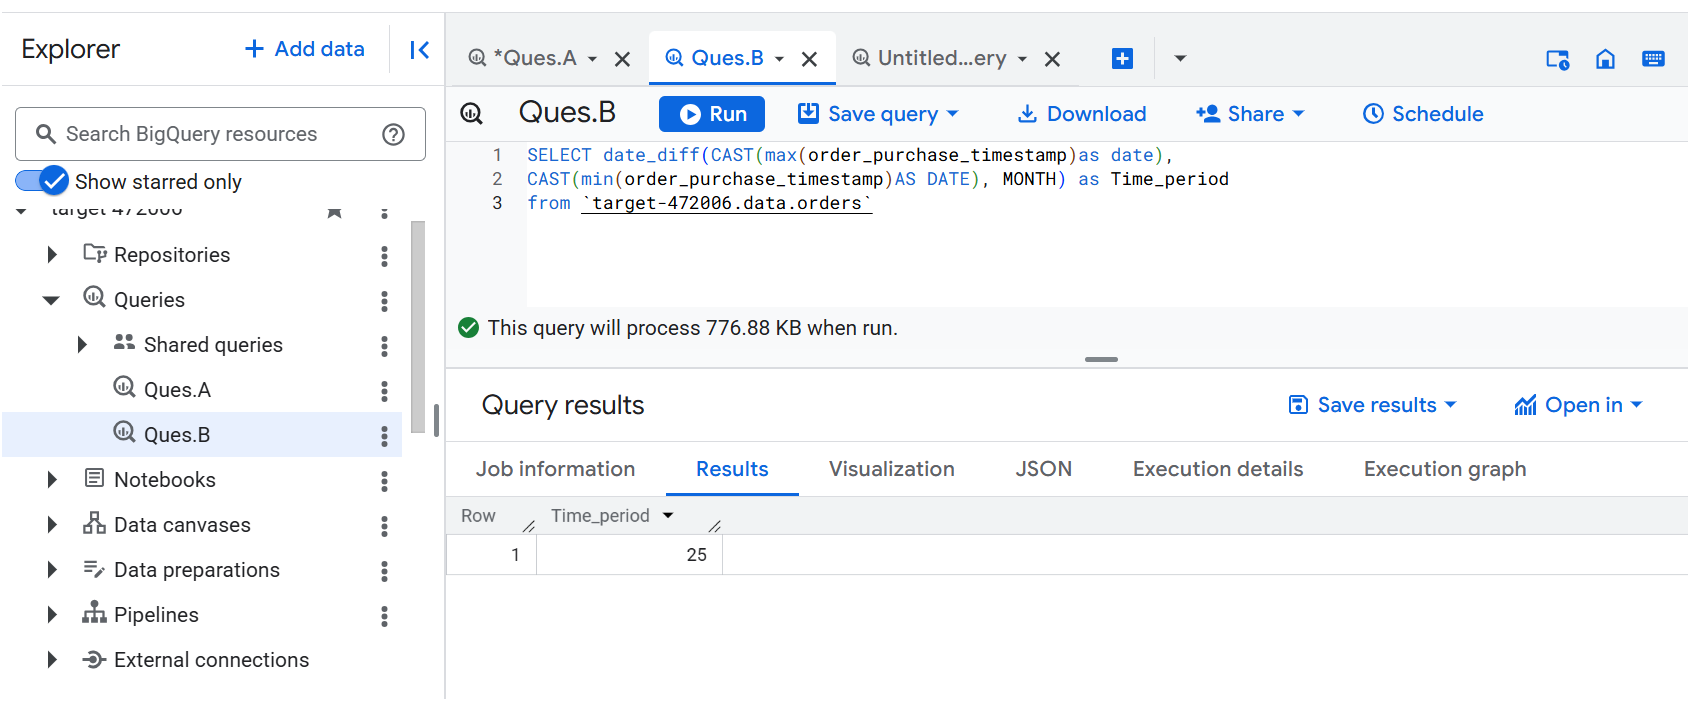

**Insights:**

* The dataset covers a period of **25 months** of order activity.
* This span provides enough data to study **long-term trends, seasonality, and year-over-year comparisons** in customer orders.



---



**C. Count the Cities & States of customers who ordered during the given period.**

```
SELECT
distinct c.customer_city ,c.customer_state
 FROM
`target-472006.data.orders` d
inner join
`target-472006.data.customers` as c
on c.customer_id = d.customer_id

```

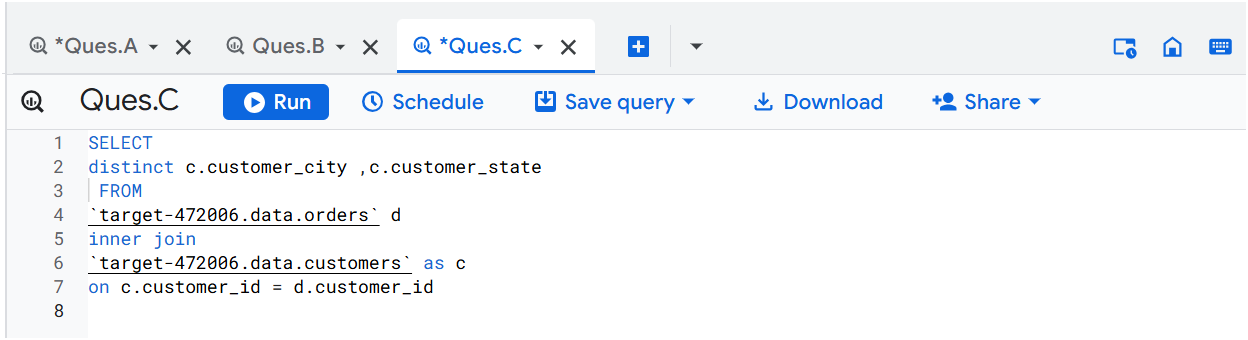

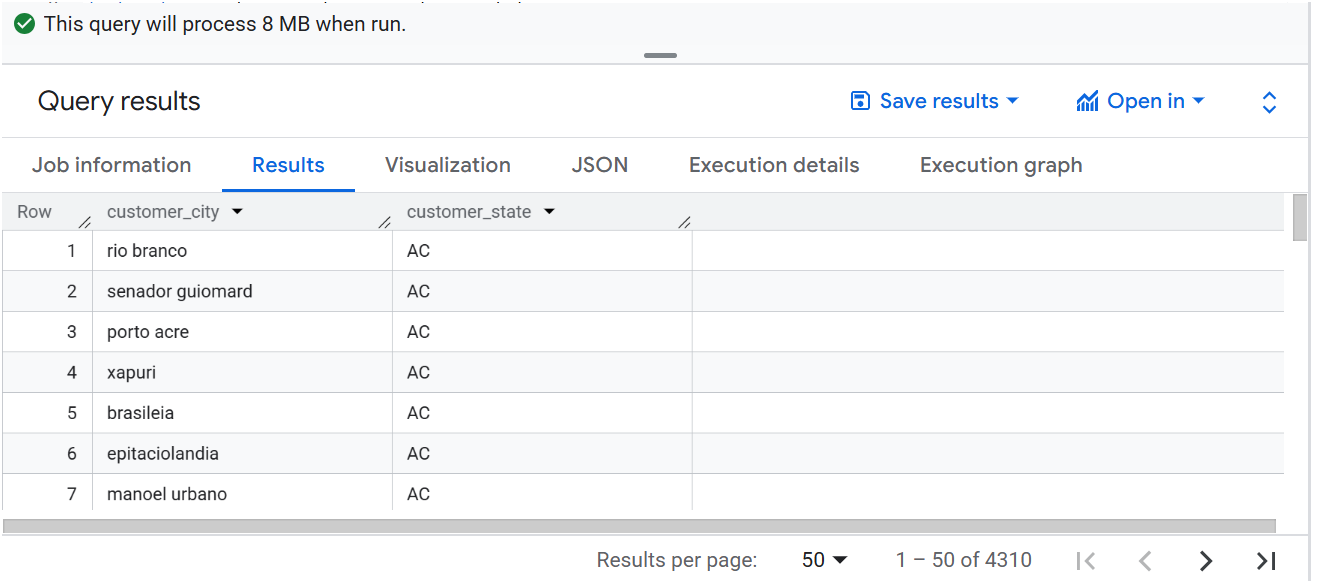

**Insights:**  
- <span style="color:blue">Customers who placed orders are spread across a **wide range of cities and states**.</span>  
- <span style="color:green">The dataset captures a **diverse geographic distribution**, which helps in analyzing **regional demand patterns** and **logistics performance**.</span>  




---



### **2. In-depth Exploration:**


**A. Is there a growing trend on e-commerce in Brazil? How can we describe a complete scenario? Can we see some seasonality with peaks at specific months?**



```
select count(order_id) as Orders_Count ,
extract(month from order_purchase_timestamp) as Month ,
extract(year from order_purchase_timestamp) as Year
from target-472006.data.orders
group by Year, Month
order by Orders_Count DESC ,Year,Month ;
```

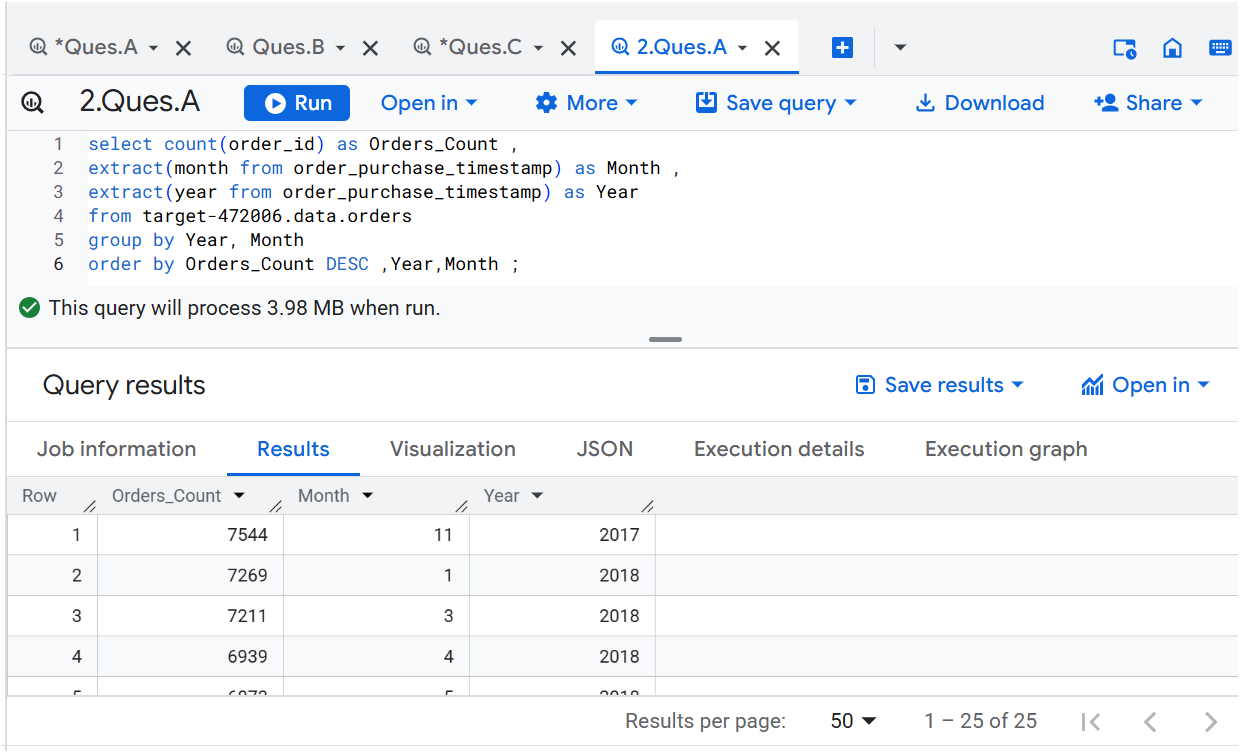

**Insights:**  
- <span style="color:blue">Order volumes show a **clear upward trend** from late 2016 through 2018, confirming steady growth in Brazil’s e-commerce sector.</span>  
- <span style="color:green">There is visible **seasonality**, with peaks in **November 2017** (likely holiday sales) and strong activity across the first half of 2018.</span>  
- <span style="color:orange">This indicates both **year-over-year growth** and **seasonal spikes** that businesses can leverage for marketing and inventory planning.</span>  




---



**B. What time do Brazilian customers tend to buy (Dawn, Morning, Afternoon or Night?**

```
select count(*) as orders_count,
CASE
WHEN hour between 0 and 6 then 'Dawn'
when hour between 6 and 12 then 'Morning'
when hour between 12 and 18 then 'Evening' ELSE 'Night'
END as Buying_Time
 from(select
extract(month from order_purchase_timestamp) as Month ,
extract(year from order_purchase_timestamp) as Year,
extract(hour from order_purchase_timestamp) as Hour from target-472006.data.orders)
group by Buying_Time
order by orders_count DESC


```

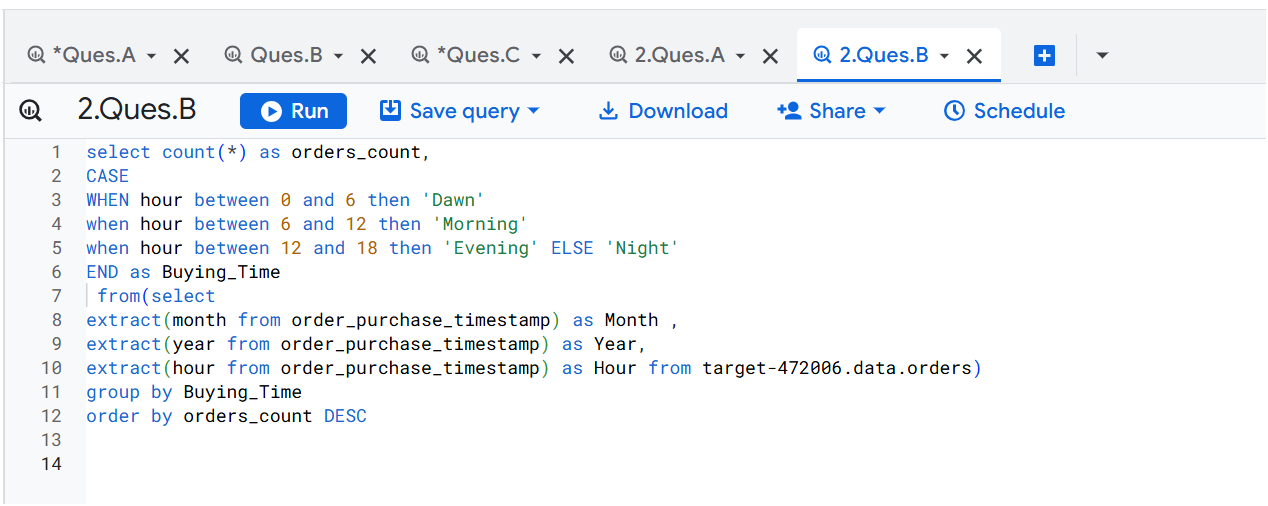

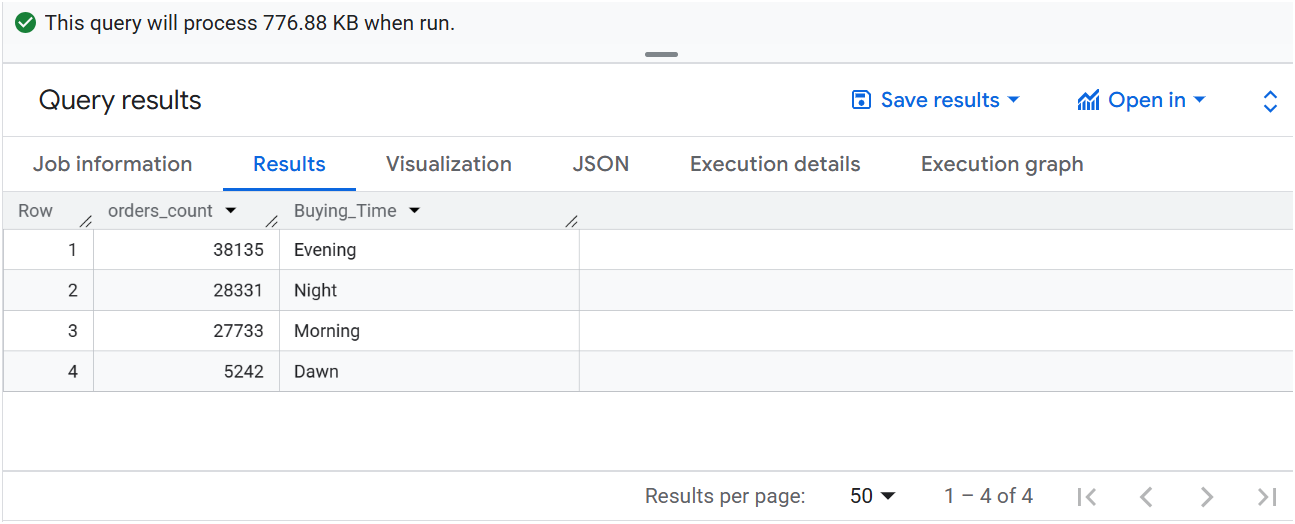

**Insights:**  
- <span style="color:blue">Most orders are placed in the **Evening (12–18 hrs)**, showing it as the peak buying window.</span>  
- <span style="color:green">A significant number of purchases also occur at **Night (19–23 hrs)** and **Morning (6–12 hrs)**, while **Dawn (0–6 hrs)** has very low activity.</span>  
- <span style="color:orange">This indicates customers prefer shopping **after work hours**, suggesting marketing campaigns and promotions should target **evenings and nights**.</span>  




---



### **3. Evolution of E-commerce orders in the Brazil region:**


**A. Get month on month orders by states**


```
select c.customer_state ,count(order_id) as No_of_order,
extract(month from order_purchase_timestamp) as Month,
extract(year from order_purchase_timestamp) as Year
from `target-472006.data.customers` as c
inner join
 `target-472006.data.orders` as d
on c.customer_id = d.customer_id
group by Year, Month , c.customer_state
Order by Year, Month ;

```

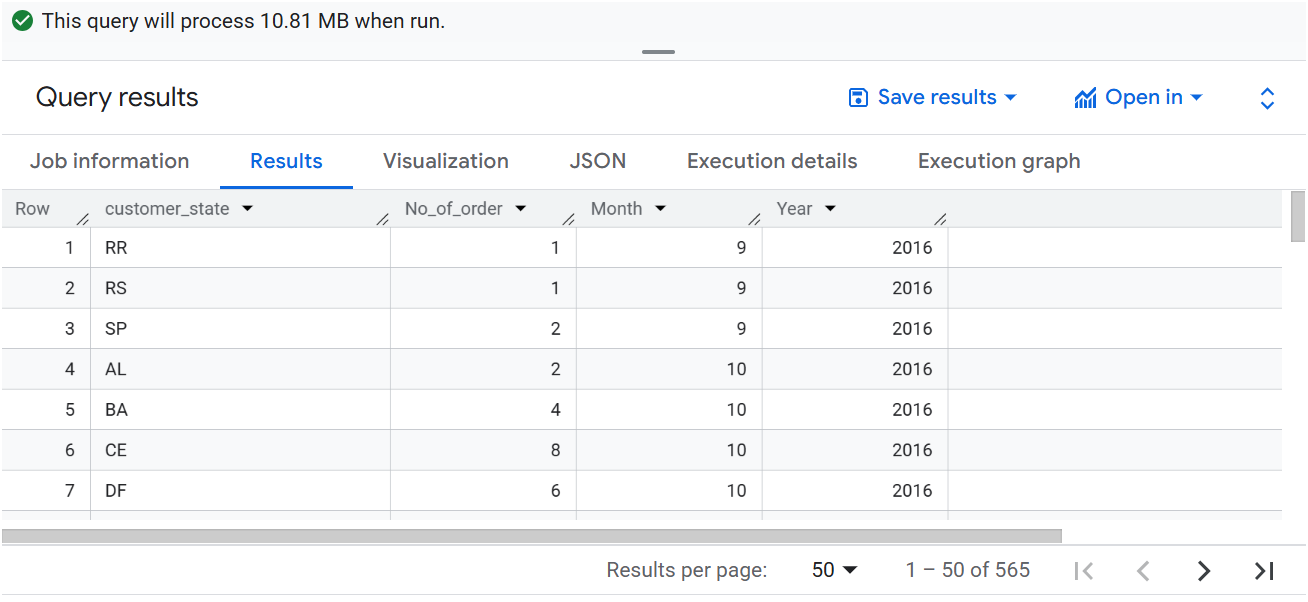

**Insights:**  
- <span style="color:blue">Orders are consistently spread across **multiple Brazilian states**, showing a broad regional adoption of e-commerce.</span>  
- <span style="color:green">States like **São Paulo (SP), Rio de Janeiro (RJ), and Minas Gerais (MG)** show the highest month-on-month order volumes, indicating they are the key demand hubs.</span>  
- <span style="color:orange">The steady increase in orders across diverse states highlights **nationwide growth**, not just concentration in a single region.</span>  


**B. Distribution of customers across the states in Brazil**

- **Distribution of customers across the states in Brazil with respect to orders -**





```
select c.customer_state ,count(order_id) as No_of_order,
from `target-472006.data..customers` as c
inner join
 `target-472006.data.orders` as d
on c.customer_id = d.customer_id
group by c.customer_state


```

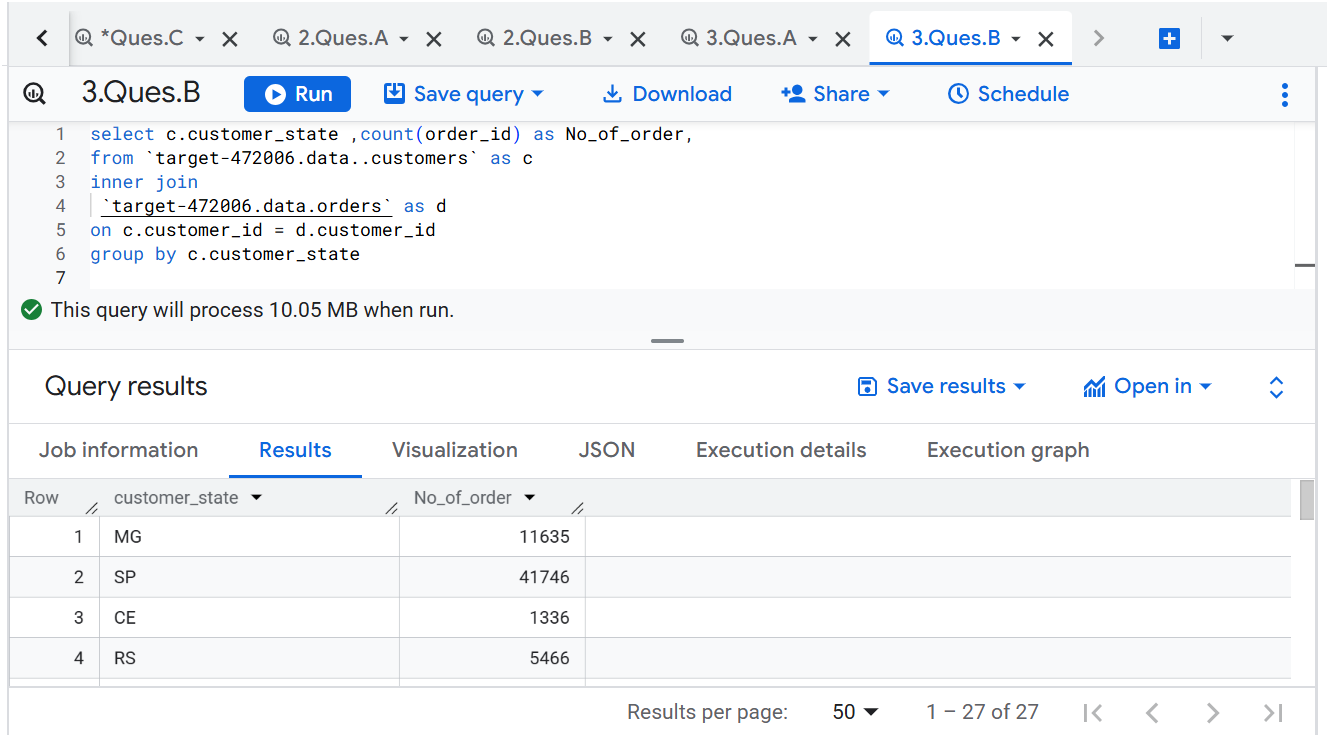

**Insights:**  
- <span style="color:blue">Customer orders are **heavily concentrated in São Paulo (SP)** with over 41k orders, followed by **Rio de Janeiro (RJ)** and **Minas Gerais (MG).</span>  
- <span style="color:green">Northern states like **Roraima (RR), Amapá (AP), and Acre (AC)** show very low order counts, reflecting weaker e-commerce penetration.</span>  
- <span style="color:orange">This indicates that Brazil’s e-commerce is **driven by major urban/industrial states**, while smaller regions remain underdeveloped markets.</span>  




---



### **4. Impact on Economy: Analyze the money movement by e-commerce by looking at order prices, freight and others.**


**A. Get % increase in cost of orders from 2017 to 2018 (include months between Jan to Aug only)**
- You can use “`payment_value`” column in payments table


```
select
round(((a_sales - b_sales)/(b_sales))*100, 0) as per_increase
from (
select
sum(case when year =2018 and month between 1 and 8 then payment_value end) as a_sales,
sum(case when year =2017 and month between 1 and 8 then payment_value end) as b_sales,
from (
select
extract(month from d.order_purchase_timestamp) as Month,
extract(year from d.order_purchase_timestamp) as Year,
p.payment_value
from `target-472006.data.payments` as p
inner join
 `target-472006.data.orders` as d
on p.order_id = d.order_id )) ;

```

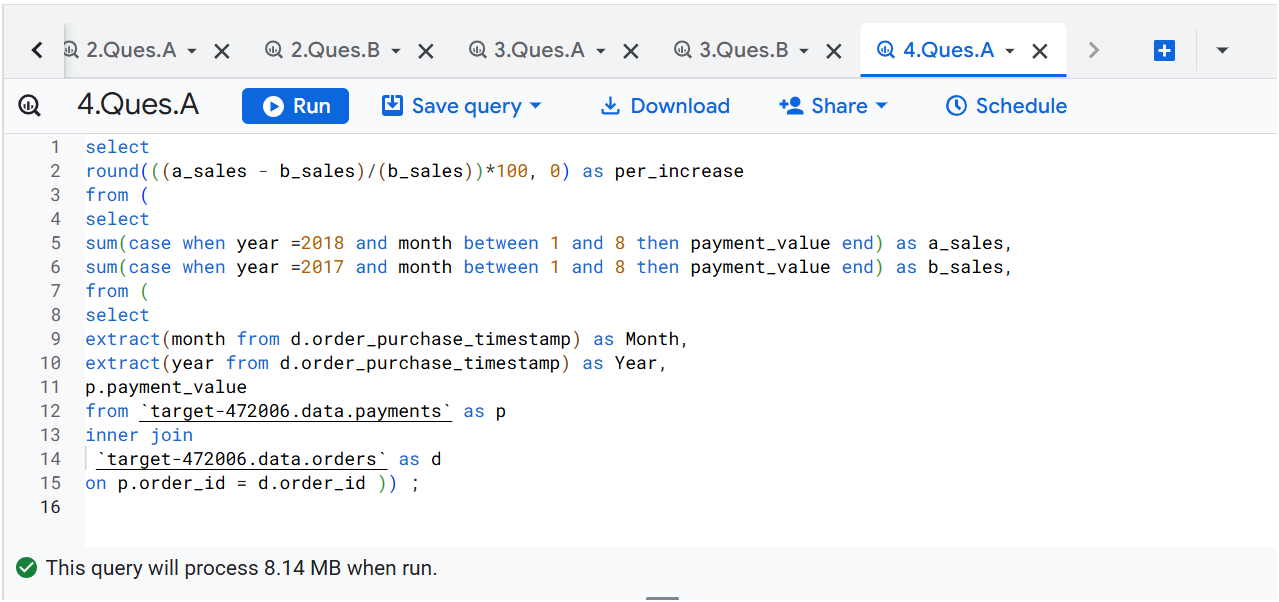

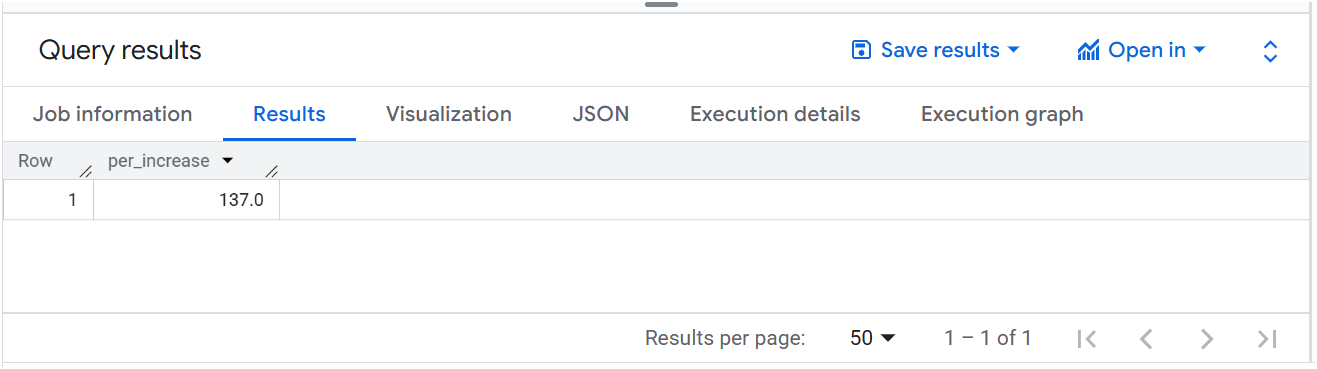

**Insights:**  
- <span style="color:blue">Between **Jan–Aug 2017 and Jan–Aug 2018**, the total cost of orders increased by about **137%**.</span>  
- <span style="color:green">This sharp growth highlights the **rapid expansion of Brazil’s e-commerce sector**, reflecting both rising demand and higher transaction volumes.</span>  
- <span style="color:orange">Such a strong YoY growth suggests **significant market opportunities**, making it crucial for businesses to scale logistics and payment infrastructure.</span>  




---



**B. Mean & Sum of price and freight value by customer state**





```

SELECT c.customer_state ,
round(sum(i.price),0) as sum_of_price,
round(AVG(i.price),0) as mean_of_price,
round(sum(i.freight_value),0) as sum_of_freight_value,
round(avg(i.freight_value),0) as mean_of_freight_value,
from `target-472006.data.order_items` i
inner join `target-472006.data.orders` o
on i.order_id =o.order_id
inner join `target-472006.data.customers` c
on c.customer_id = o.customer_id
group by customer_state
order by sum_of_price desc ;

```

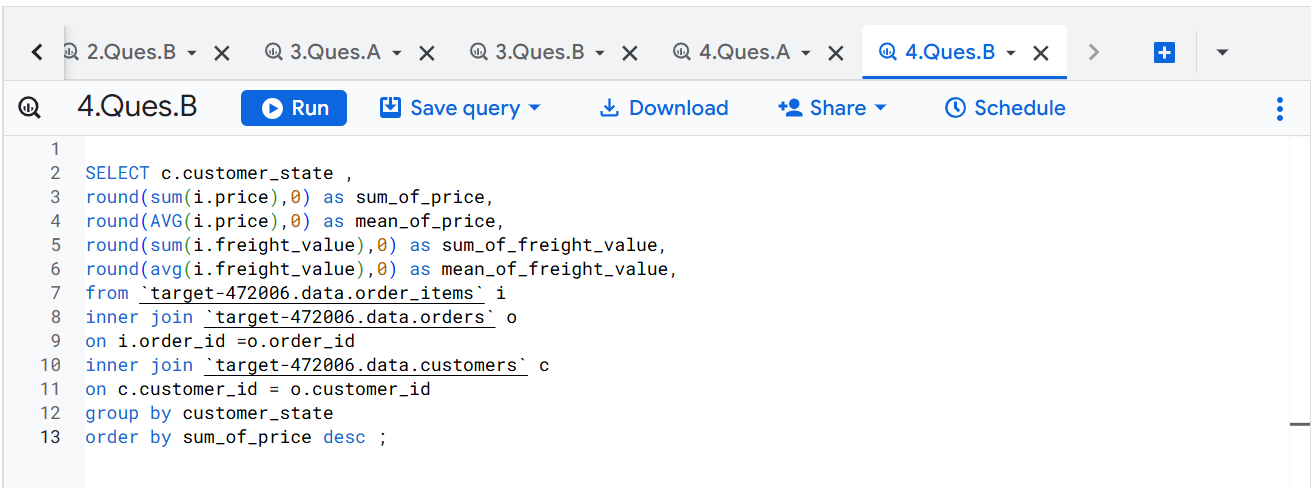

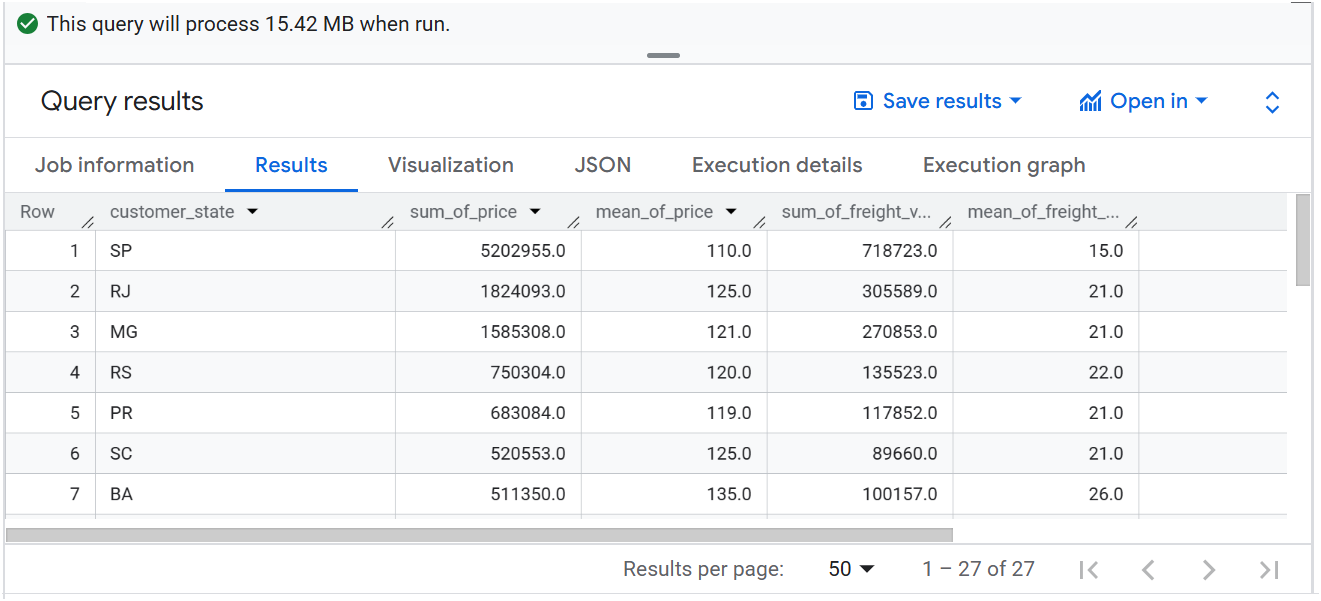

**Insights:**  
- <span style="color:blue">**São Paulo (SP)** dominates with the highest total sales (5.2M) and freight value (719K), making it the key revenue driver in Brazil’s e-commerce market.</span>  
- <span style="color:green">While states like **RJ and MG** also show strong contributions, smaller states (e.g., AC, AP, RR) record very low totals, reflecting **regional disparity** in e-commerce penetration.</span>  
- <span style="color:orange">Interestingly, northern/northeastern states (e.g., PB, AL, MA) show **higher mean product and freight costs**, suggesting higher logistics expenses and possible accessibility challenges.</span>  




---



### **5. Analysis on sales, freight and delivery time**


**A. Calculate days between purchasing, delivering and estimated delivery**



```
select order_id,
extract(day from (Date_of_deliver - Date_of_purchasing)) as days_bw_purchase_and_delivery,
extract(day from (Date_of_deliver - Date_of_estimated_delivery)) as days_bw_deliver_and_estimated_delivery,
from (select
order_id ,
extract(date from o.order_purchase_timestamp) as Date_of_purchasing,
extract(date from o.order_delivered_customer_date) as Date_of_deliver,
extract(date from o.order_estimated_delivery_date) as Date_of_estimated_delivery
from `target-472006.data.orders` as o );

```

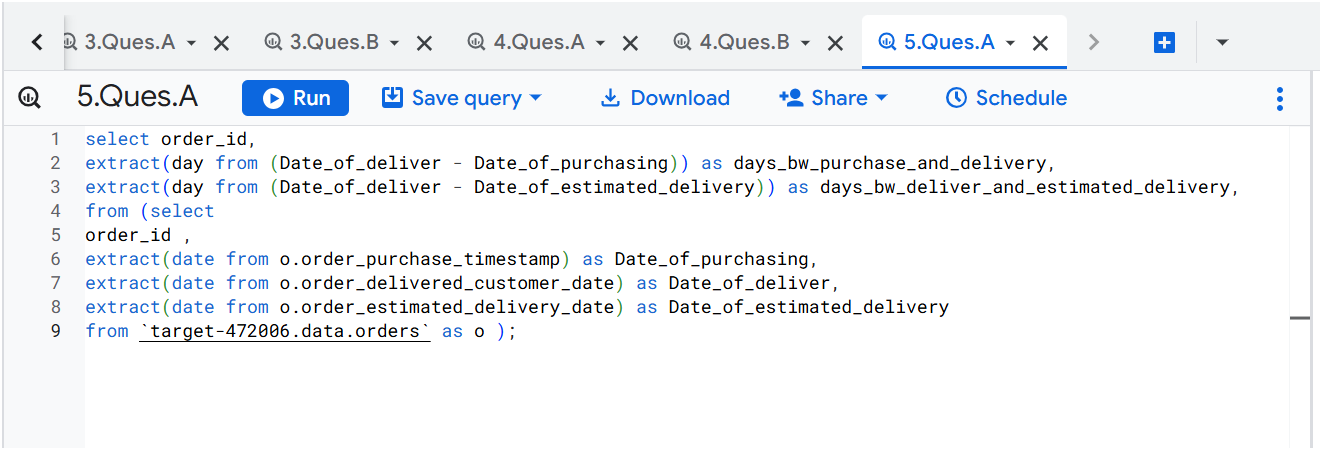

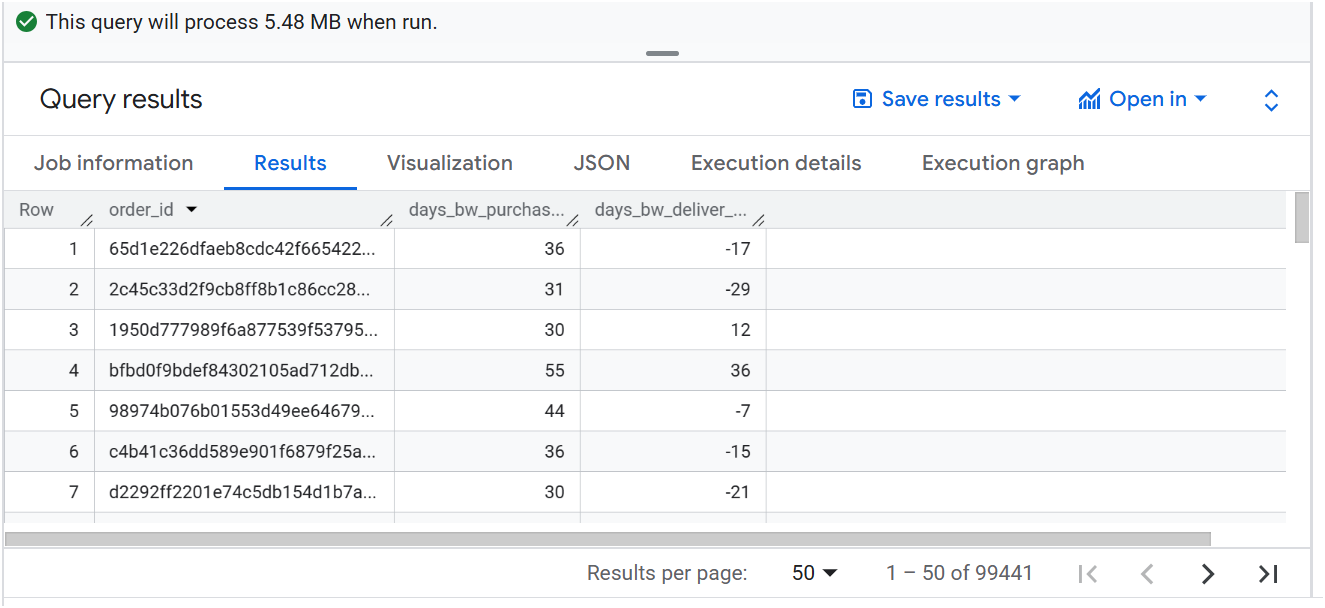

**Insights:**  
- <span style="color:blue">On average, orders take **around 30–50 days** from purchase to delivery, showing relatively long fulfillment cycles.</span>  
- <span style="color:green">Many records have **negative gaps** between estimated and actual delivery, meaning orders were delivered **earlier than the estimated date**.</span>  
- <span style="color:orange">This suggests that while delivery times are long, the company often **overestimates timelines**, leading to pleasantly faster deliveries for customers.</span>  




---



**B. Find time_to_delivery & diff_estimated_delivery. Formula for the same given below:**

- time_to_delivery = order_purchase_timestamp-order_delivered_customer_date
- diff_estimated_delivery = order_estimated_delivery_date-order_delivered_customer_date


```
select order_id,
extract(day from (time_of_purchasing - Date_of_deliver)) as time_to_delivery,
extract(day from (Date_of_estimated_delivery - Date_of_deliver)) as diff_estimated_delivery,
from (select
order_id ,
extract(date from o.order_purchase_timestamp) as time_of_purchasing,
extract(date from o.order_delivered_customer_date) as Date_of_deliver,
extract(date from o.order_estimated_delivery_date) as Date_of_estimated_delivery
from `target-472006.data.orders` as o );

```

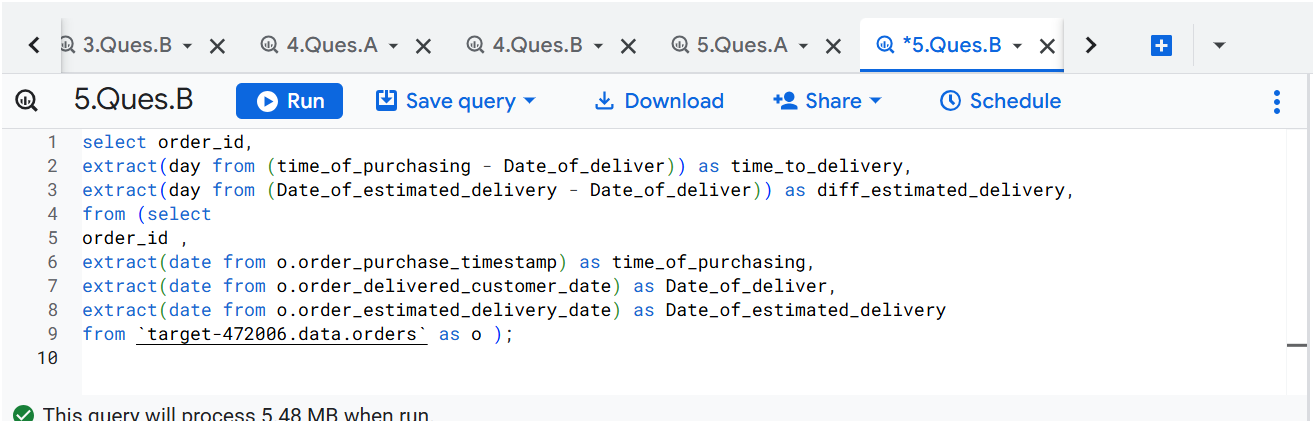

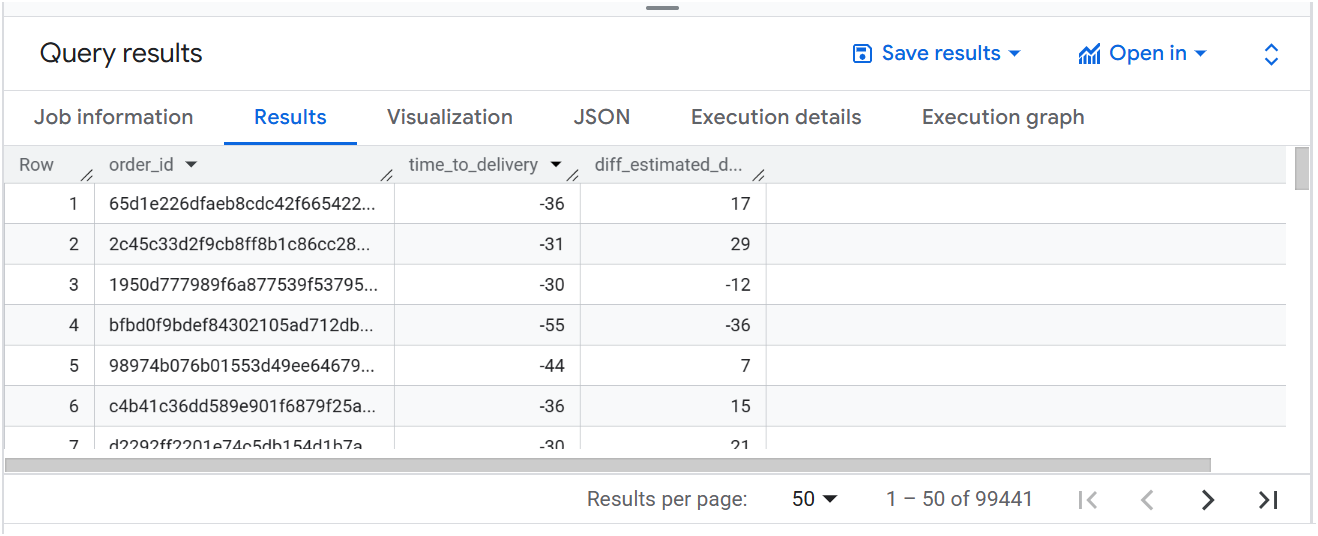

**insight:**

* **Delivery Time (`time_to_delivery`)**: Negative values indicate the calculation is reversed. Conceptually, delivery occurs **after purchase**, so actual delivery durations are positive.
* **Difference from Estimated Delivery (`diff_estimated_delivery`)**: Values vary between positive and negative, showing **some orders arrive earlier and some later** than estimated.
* There is **inconsistency in delivery accuracy**, suggesting potential improvement areas in **delivery time prediction and logistics planning**.




---



**C. Group data by state, take mean of freight_value, time_to_delivery, diff_estimated_delivery**

```
select customer_state,
round(avg(freight_value),0) as mean_of_freight_value ,
round(avg(extract(day from Date_of_purchasing - Date_of_delivering )),0) as time_to_delivery,
round(avg(extract(day from Date_of_delivering - Date_of_estimated_delivery)),0) as diff_estimated_delivery,
from
(select
customer_state,freight_value,
extract(date from o.order_purchase_timestamp) as Date_of_purchasing,
extract(date from o.order_delivered_customer_date) as Date_of_delivering,
extract(date from o.order_estimated_delivery_date) as Date_of_estimated_delivery,
from `target-472006.data.orders` o
inner join `target-472006.data.order_items` i
on i.order_id =o.order_id
inner join `target-472006.data.customers` as c
on c.customer_id = o.customer_id )
group by customer_state ;

```

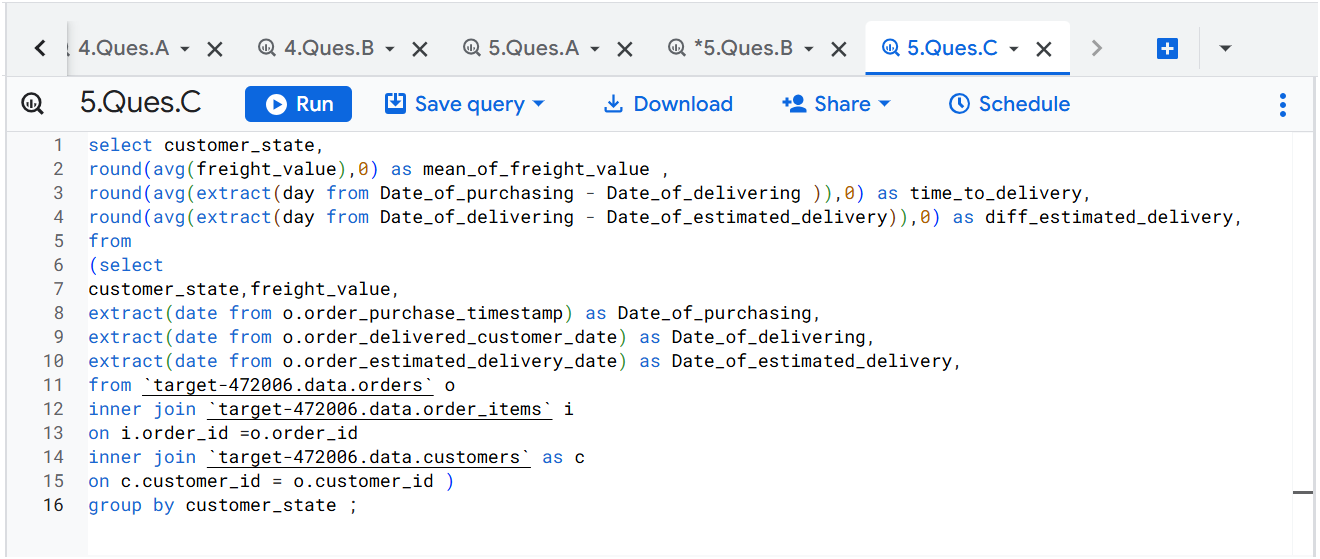

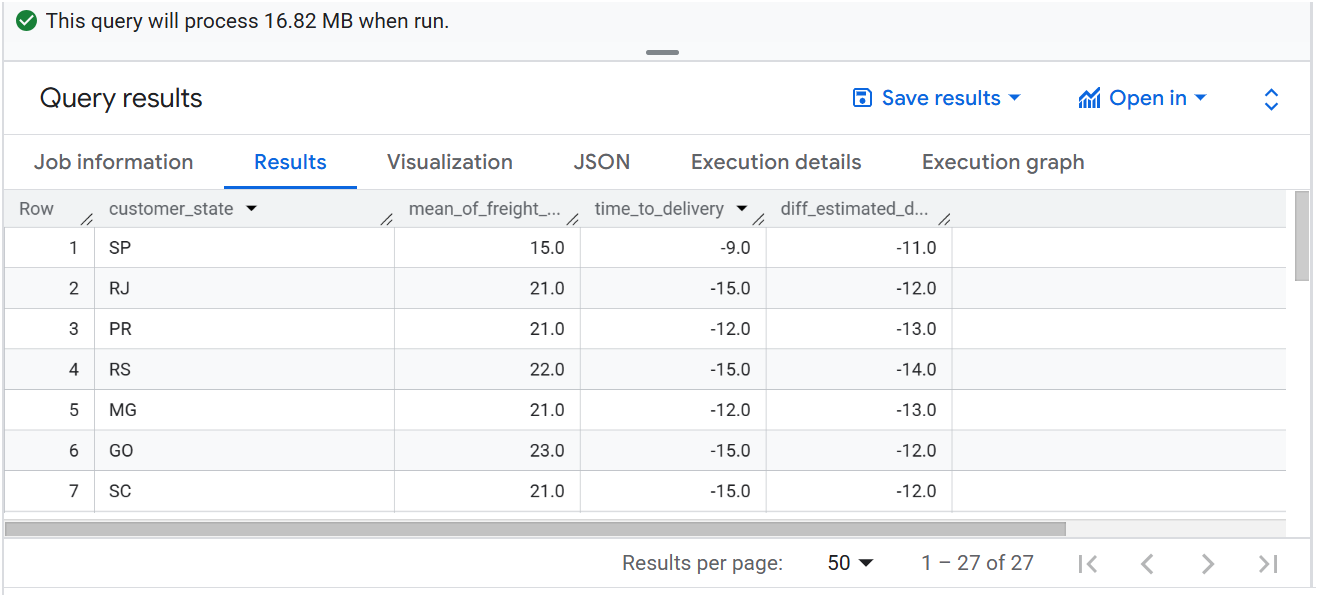

**Insight:**

* **Freight Costs**: States like PB, RR, AC, and AP have **much higher average freight values**, indicating higher shipping costs in those regions.
* **Delivery Times (`time_to_delivery`)**: Northern and remote states (e.g., AM, RR, AP) show **longer delivery durations**, while southern states like SP and PR have **shorter delivery times**.
* **Delivery Accuracy (`diff_estimated_delivery`)**: Some states consistently have **negative differences**, meaning orders often arrive **later than estimated**, especially in remote regions like AM, RO, AC, and RR.




---



**D. Top 5 states with highest/lowest average freight value - sort in desc/asc limit 5**


**D.1  - For Highest average freight value**

```

select c.customer_state,
round(avg(i.freight_value),0) as Avg_highest_freight_value
from `target-472006.data.order_items` i
inner join `target-472006.data.orders` o
on i.order_id =o.order_id
inner join `target-472006.data.customers` c
on c.customer_id = o.customer_id
group by customer_state
order by Avg_highest_freight_value DESC limit 5 ;

```

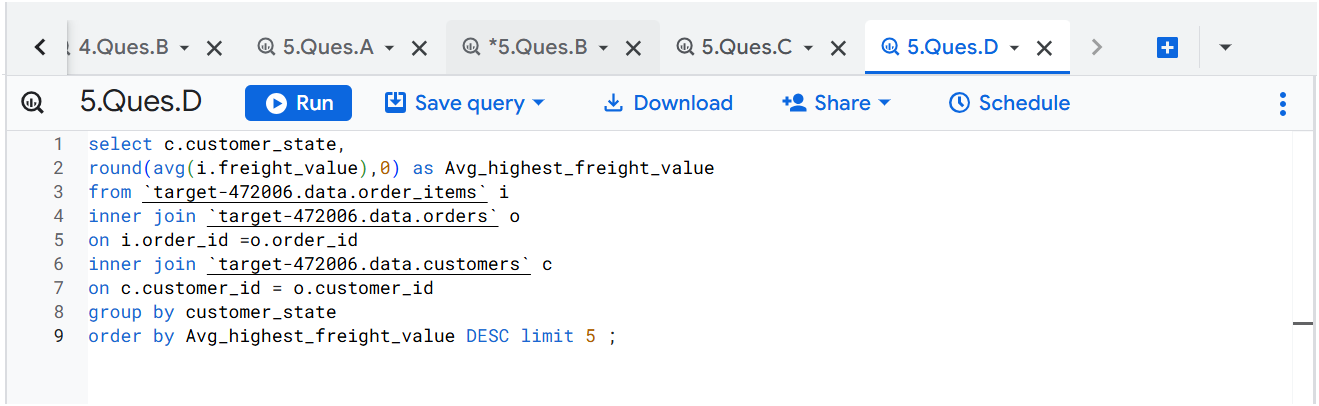

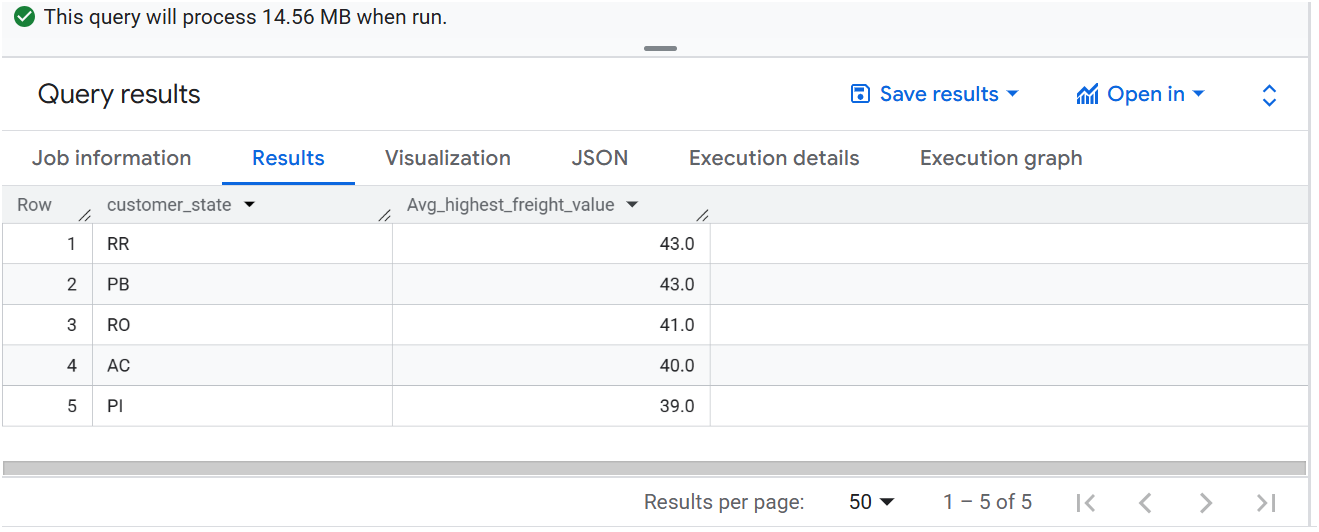

**Insights:**

**Top 5 Brazilian states with the highest average freight values**:

* **Roraima (RR)** and **Paraíba (PB)** lead with the **highest average freight cost (43)**, showing the greatest shipping expense.
* **Rondônia (RO)** and **Acre (AC)** follow closely (≈40–41), reflecting **remote location and difficult logistics**.
* **Piauí (PI)** also ranks high (39), indicating **above-average freight challenges** compared to central and southern states.

👉 Overall, **northern and remote states in Brazil face the highest delivery costs**, likely due to distance and limited infrastructure.




---



**D.2 - for lowest average freight value**

 ```
 select c.customer_state,
round(avg(i.freight_value),0) as Avg_lowest_freight_value
from `target-472006.data.order_items` i
inner join `target-472006.data.orders` o
on i.order_id =o.order_id
inner join `target-472006.data.customers` c
on c.customer_id = o.customer_id
group by customer_state
order by Avg_lowest_freight_value asc limit 5 ;

```

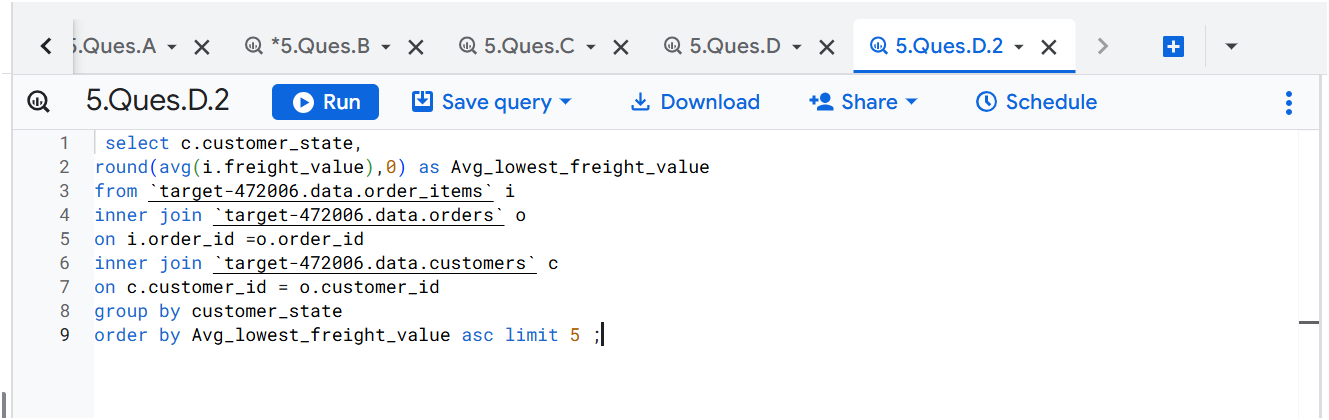

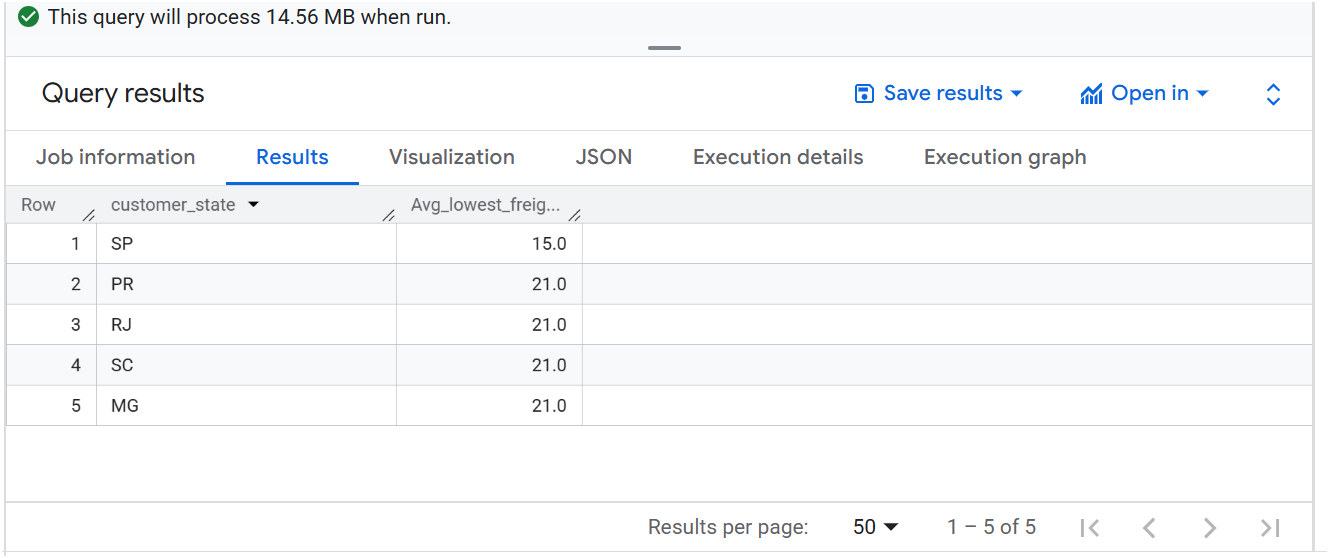

**Insights:**

**Top 5 Brazilian states with the lowest average freight values**:

* **São Paulo (SP)** has the **lowest average freight (15)**, reflecting its strong logistics network and central role in Brazil’s commerce.
* **Paraná (PR), Rio de Janeiro (RJ), Santa Catarina (SC), and Minas Gerais (MG)** follow closely (≈21), showing **efficient delivery infrastructure**.
* Overall, **southeastern and southern states enjoy the lowest freight costs**, thanks to **better connectivity, higher order volumes, and proximity to major distribution hubs**.




---



**E. Top 5 states with highest/lowest average time to delivery**


**E.1 - LOWEST AVERAGE TIME TO DELIVERY**



```

select customer_state,
round(avg(extract(day from Date_of_deliver - time_of_purchasing)),0) as highest_Avg_time_to_delivery
from (select customer_state,
extract(date from o.order_purchase_timestamp) as time_of_purchasing,
extract(date from o.order_delivered_customer_date) as Date_of_deliver,
from `target-472006.data.orders` as o
inner join `target-472006.data.customers` c
on c.customer_id = o.customer_id )
group by customer_state
order by highest_Avg_time_to_delivery ASC limit 5;

```

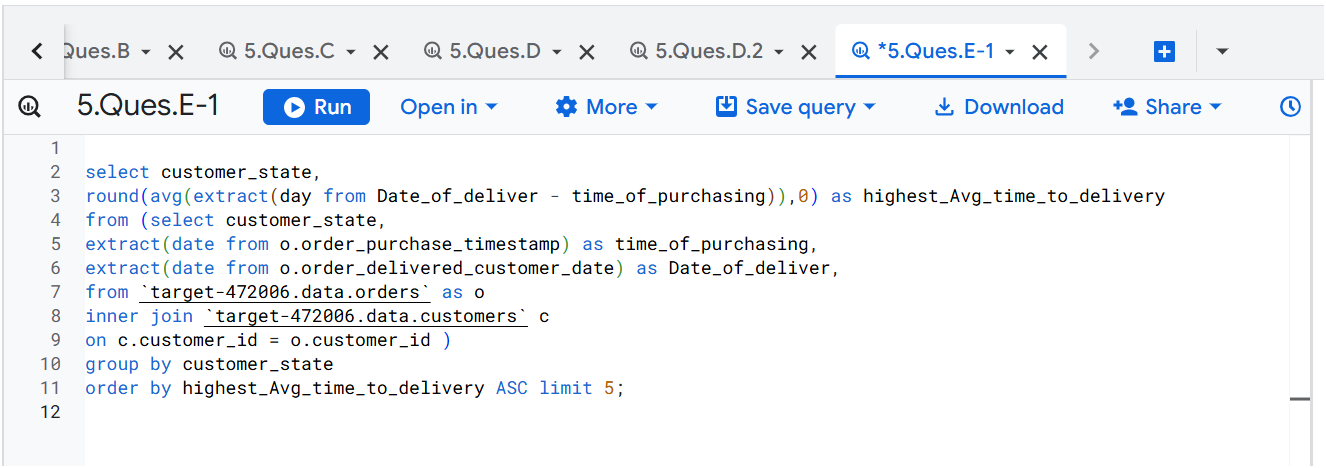

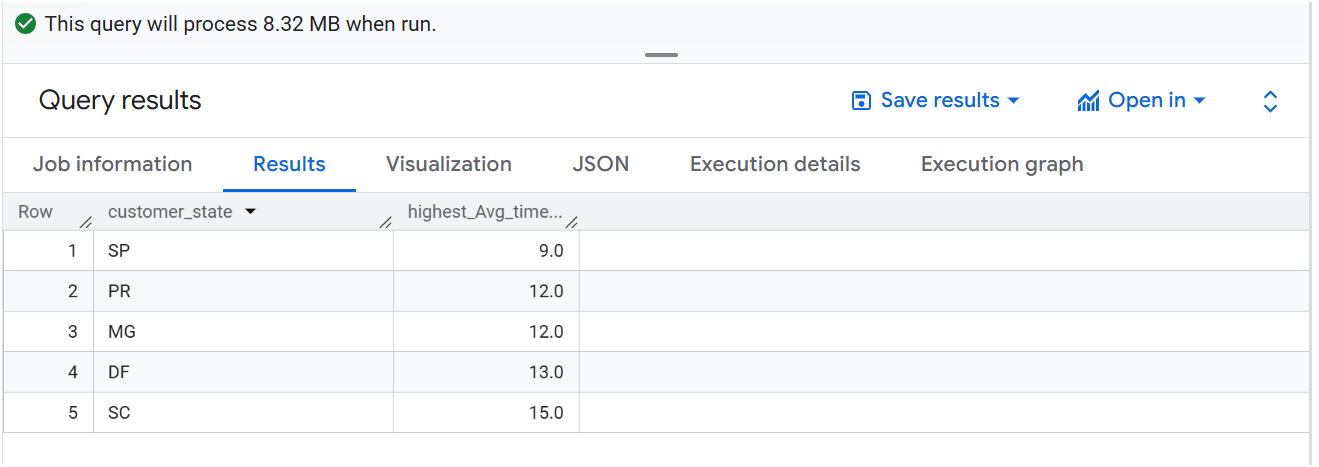

**Insights:**

* **São Paulo (SP)** shows the shortest delivery gap (≈ 9 days).
* **Paraná (PR), Minas Gerais (MG), Distrito Federal (DF), and Santa Catarina (SC)** range from **12 to 15 days**.
* Insight: These states represent **faster delivery regions** in Brazil, likely due to **strong logistics infrastructure and higher order density**.






---



**E.2 - HIGHEST AVERAGE TIME TO DELIVERY**

```

select customer_state,
round(avg(extract(day from Date_of_deliver - time_of_purchasing)),0) as lowest_Avg_time_to_delivery
from (select customer_state,
extract(date from o.order_purchase_timestamp) as time_of_purchasing,
extract(date from o.order_delivered_customer_date) as Date_of_deliver,
from `target-472006.data.orders` as o
inner join `target-472006.data.customers` c
on c.customer_id = o.customer_id )
group by customer_state
order by lowest_Avg_time_to_delivery DESC limit 5;
```

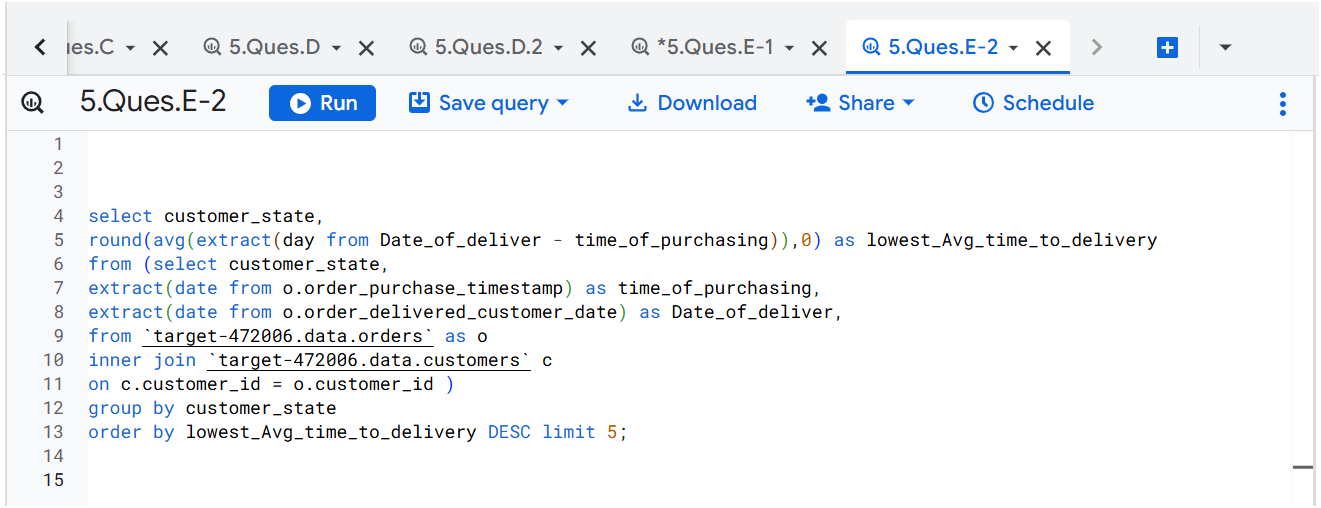

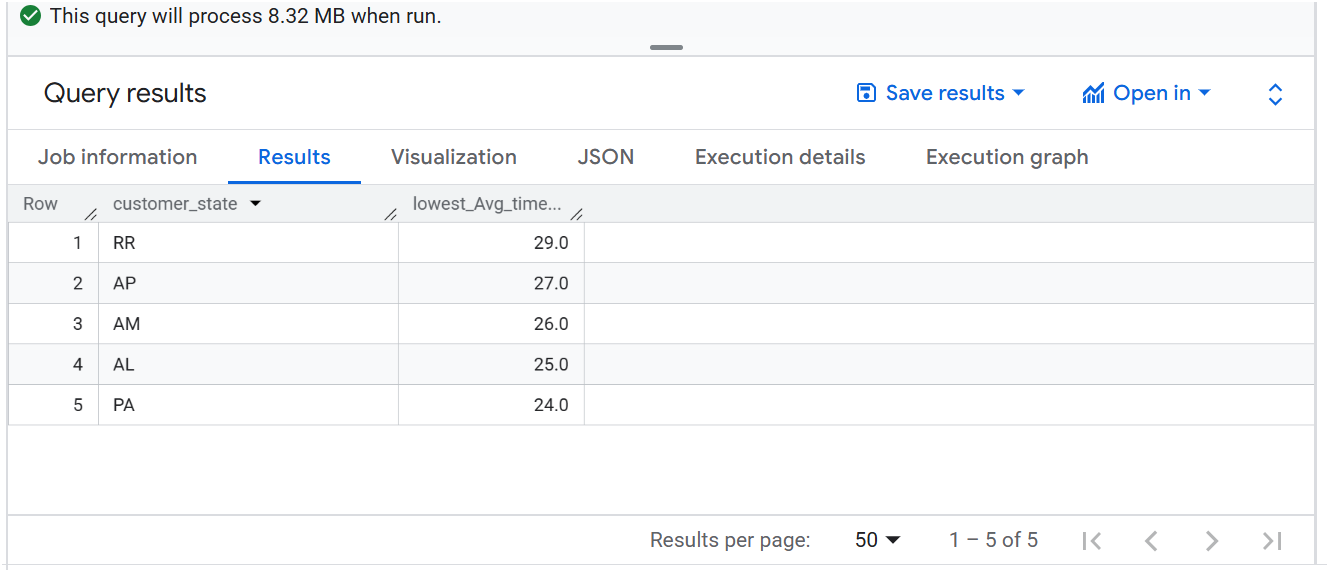

**Insight:**

* **Roraima (RR), Amapá (AP), Amazonas (AM), Alagoas (AL), and Pará (PA)** have the **longest delivery times in Brazil (24–29 days on average)**.
* These delays highlight the **logistical challenges in northern and remote regions**, where infrastructure and distance from distribution hubs slow down deliveries.




---



**F. Top 5 states where delivery is really fast/ not so fast compared to estimated date**

**F.1- Top 5 states where delivery is not so fast compared to estimated date**

```


select customer_state,
extract(day from Date_of_delivering - Date_of_estimated_delivery) as delivery_time
from (select customer_state,
extract(date from o.order_delivered_customer_date) as Date_of_delivering,
extract(date from o.order_estimated_delivery_date) as Date_of_estimated_delivery
from `target-472006.data.orders` as o
inner join `target-472006.data.customers` c
on c.customer_id = o.customer_id )
group by customer_state ,Date_of_estimated_delivery ,Date_of_delivering
order by delivery_time DESC limit 5 ;

```

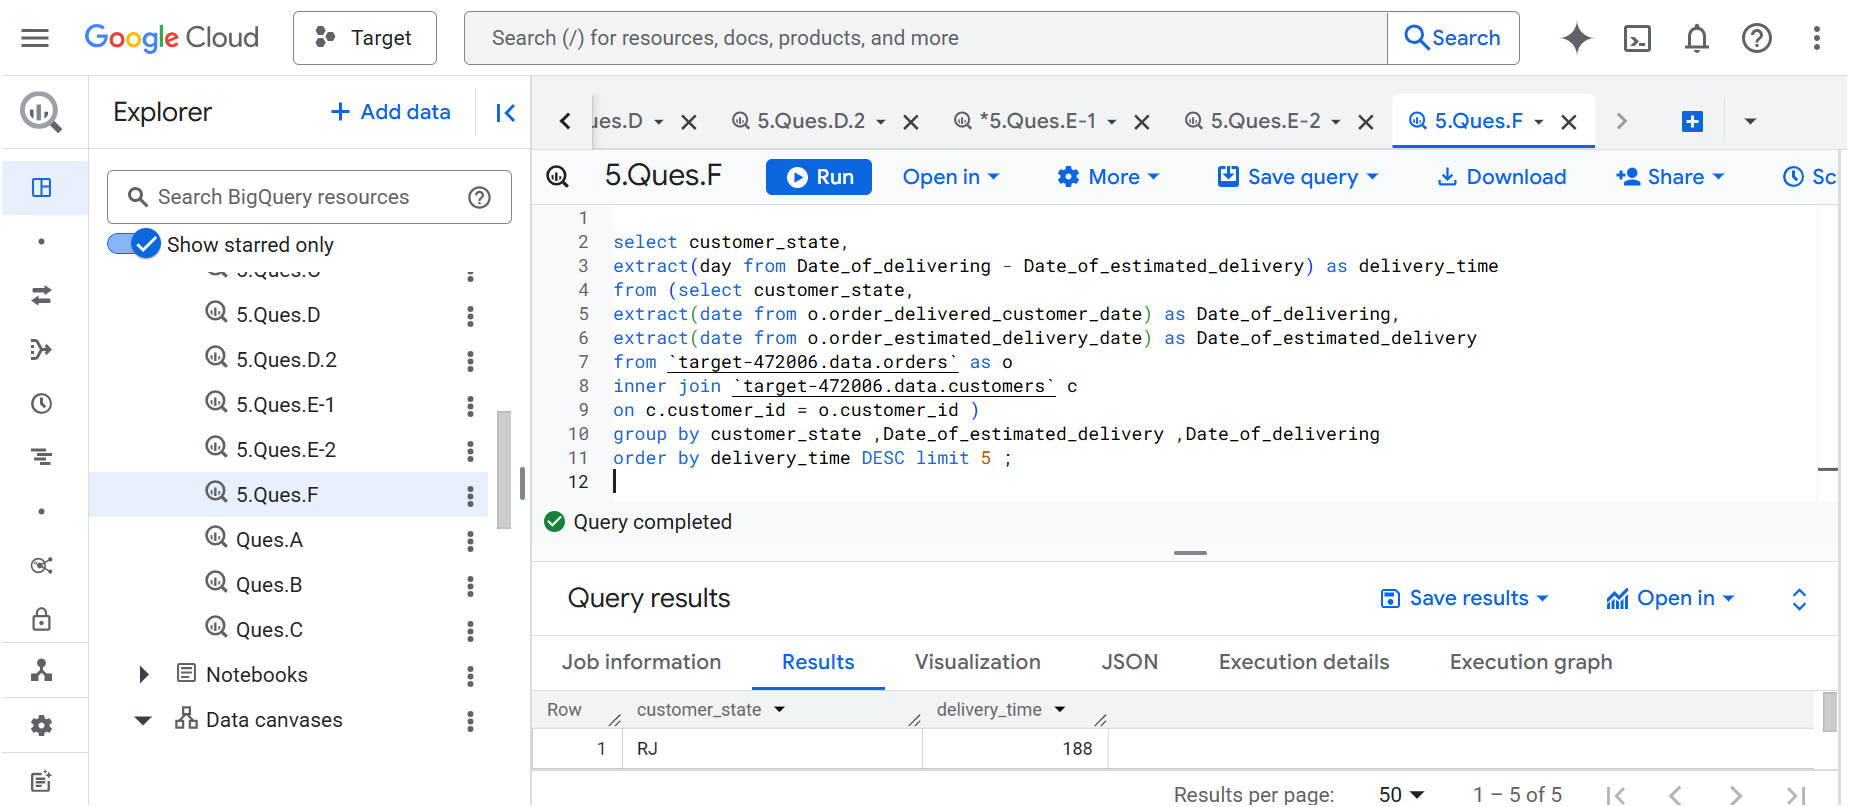

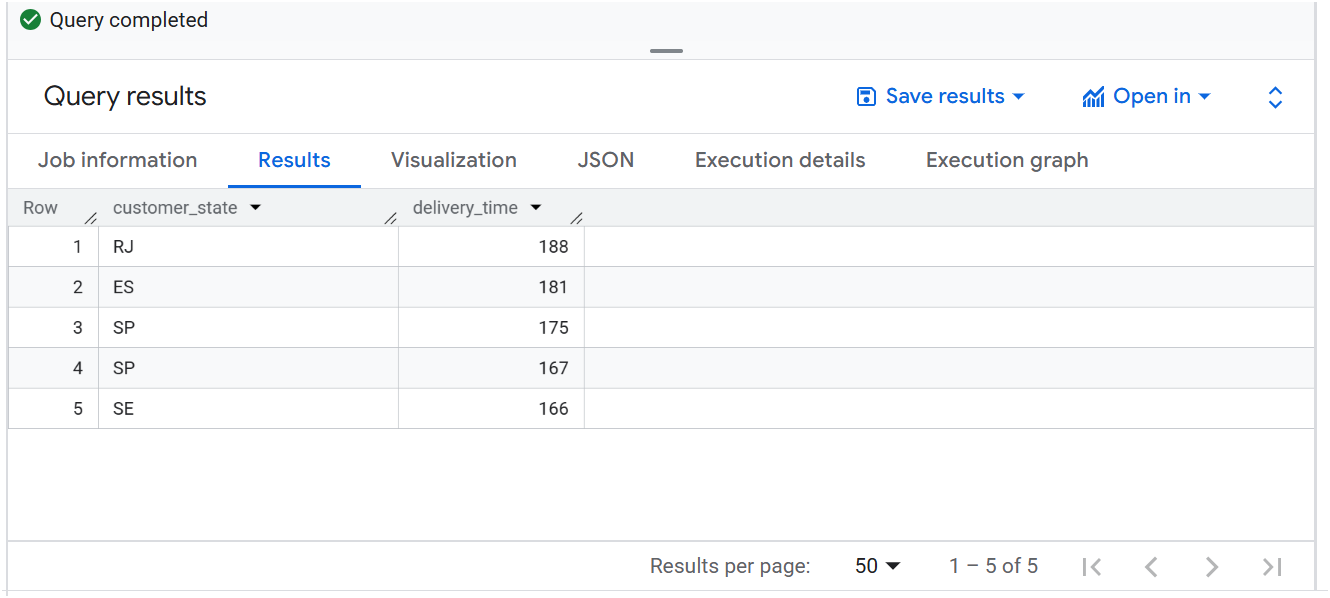

**Insight:**

* In states like **Rio de Janeiro (RJ), Espírito Santo (ES), São Paulo (SP), and Sergipe (SE)**, deliveries were completed **much later than the estimated date (≈166–188 days delay)**.
* These extreme cases show that **some orders face huge delivery delays**, likely due to exceptions such as **logistical issues, cancellations, or data quality problems** rather than normal delivery patterns.




---



**F.2 - Top 5 states where delivery is really fast (before estimated date)**

```

select customer_state,
extract(day from Date_of_delivering - Date_of_estimated_delivery) as delivery_time
from (
    select customer_state,
           extract(date from o.order_delivered_customer_date) as Date_of_delivering,
           extract(date from o.order_estimated_delivery_date) as Date_of_estimated_delivery
    from `target-472006.data.orders` as o
    inner join `target-472006.data.customers` c
    on c.customer_id = o.customer_id
)
where Date_of_delivering < Date_of_estimated_delivery   -- only early deliveries
group by customer_state, Date_of_estimated_delivery, Date_of_delivering
order by delivery_time ASC   -- ASC to get most negative (fastest) first
limit 5;

```

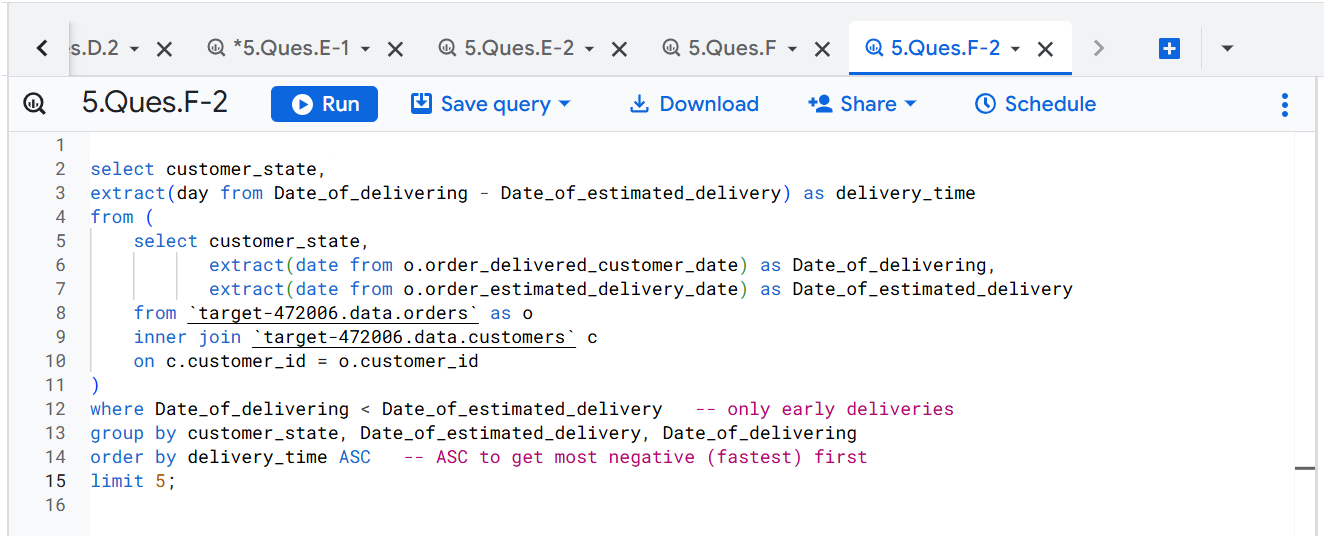

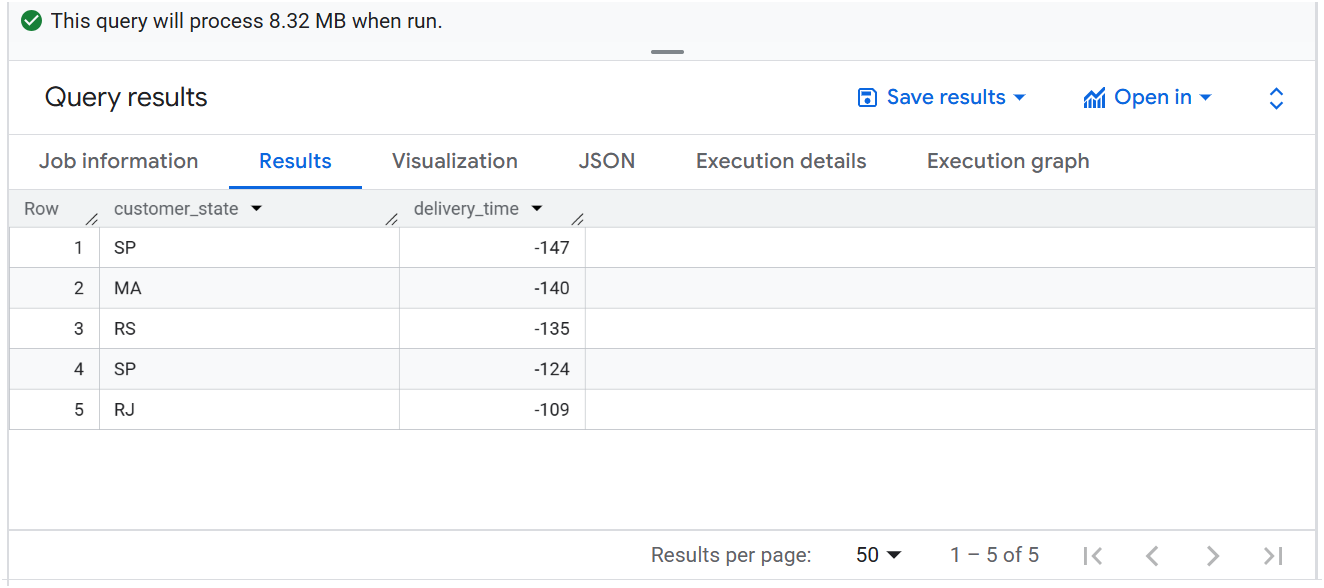

**Insight:**

* Deliveries in **SP (São Paulo), MA (Maranhão), RS (Rio Grande do Sul), and RJ (Rio de Janeiro)** were completed **well before the estimated dates**, in some cases by **over 100 days early**.
* This shows that in certain states, customers often **receive their orders much faster than promised**, possibly because the system sets **conservative (longer) estimated delivery times**.




---



### **6. Payment type analysis:**





**A. Month over Month count of orders for different payment type**

```
select count(*) as total_order, payment_type,
extract(month from o.order_purchase_timestamp) as Month,
extract(year from o.order_purchase_timestamp) as Year,
from `target-472006.data.payments` as p
inner join
 `target-472006.data.orders` as o
on p.order_id = o.order_id
inner join `target-472006.data.customers`as c
on c.customer_id = o.customer_id
group by Year, Month, payment_type ;

```

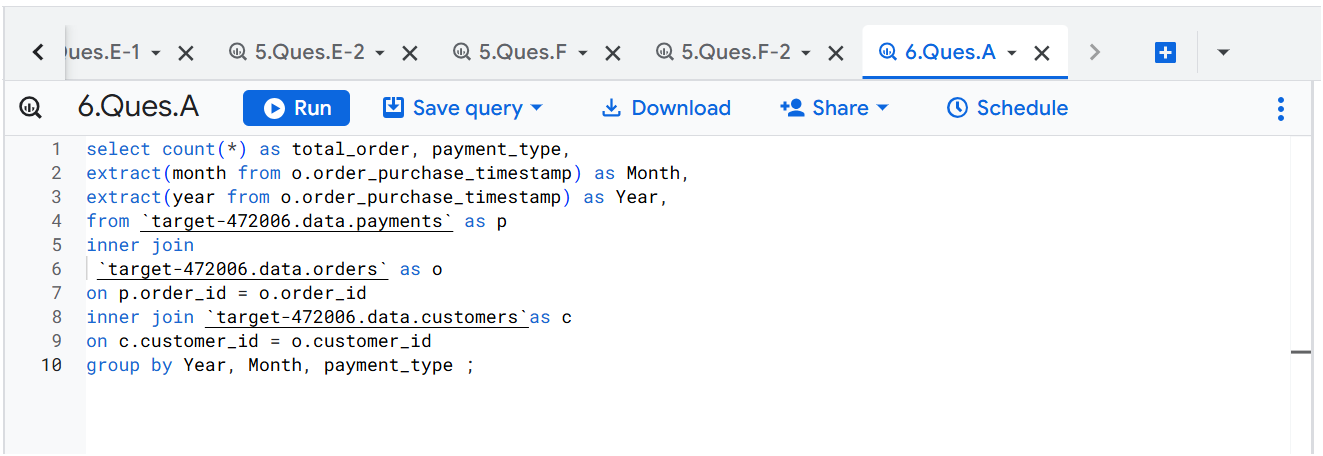

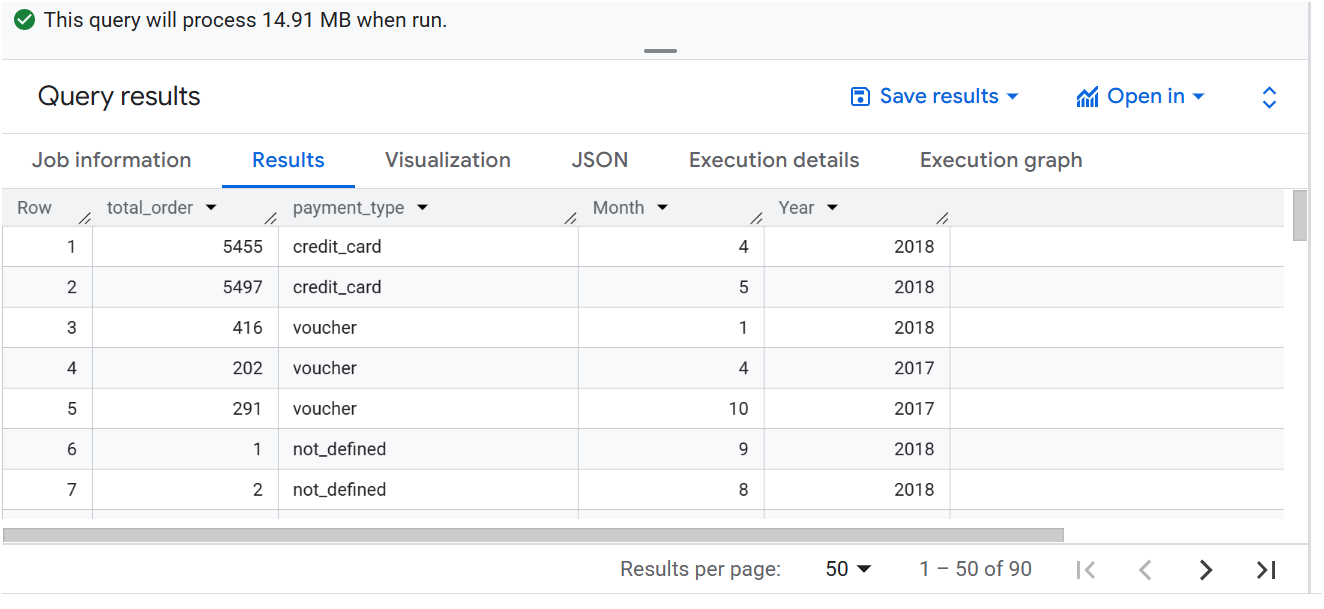

**insight summary** (Month-over-Month):

* **Credit Card** is the **most dominant payment method** across all months, with consistently **highest order counts** (peaking above **5k orders per month in 2018**).
* **Vouchers** are used but at **much smaller scale** (a few hundred per month), indicating they are more **promotional/occasional** rather than a preferred method.
* **UPI** started showing usage from **2017 onwards**, and by **2018 it gained significant traction (1000+ monthly orders)** → showing **growing adoption of digital wallets/UPI in Brazil’s e-commerce**.
* **Debit Card** and **Not Defined** are **rarely used** and have minimal contribution.

👉 Overall: **Credit cards lead**, **UPI adoption is rising**, and **vouchers act as secondary promotional tools**.






---



**B. Count of orders based on the no. of payment installments**

```
select count(*) as total_order, payment_installments,
extract(month from o.order_purchase_timestamp) as Month,
extract(year from o.order_purchase_timestamp) as Year,
from `target-472006.data.payments` as p
inner join
 `target-472006.data.orders` as o
on p.order_id = o.order_id
inner join `target-472006.data.customers`as c
on c.customer_id = o.customer_id
group by Year, Month, payment_installments ;

```

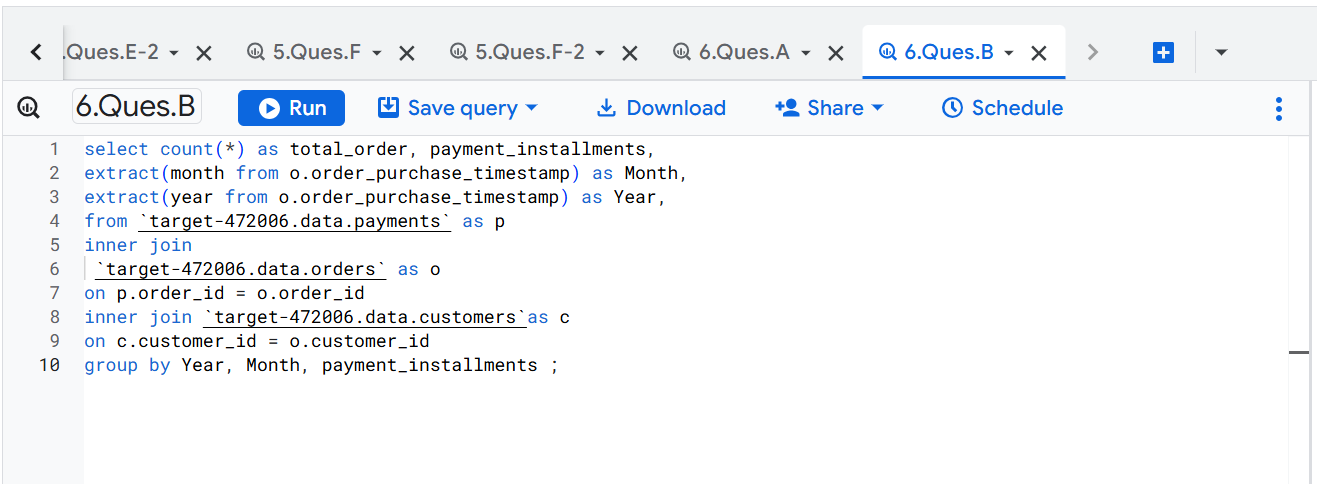

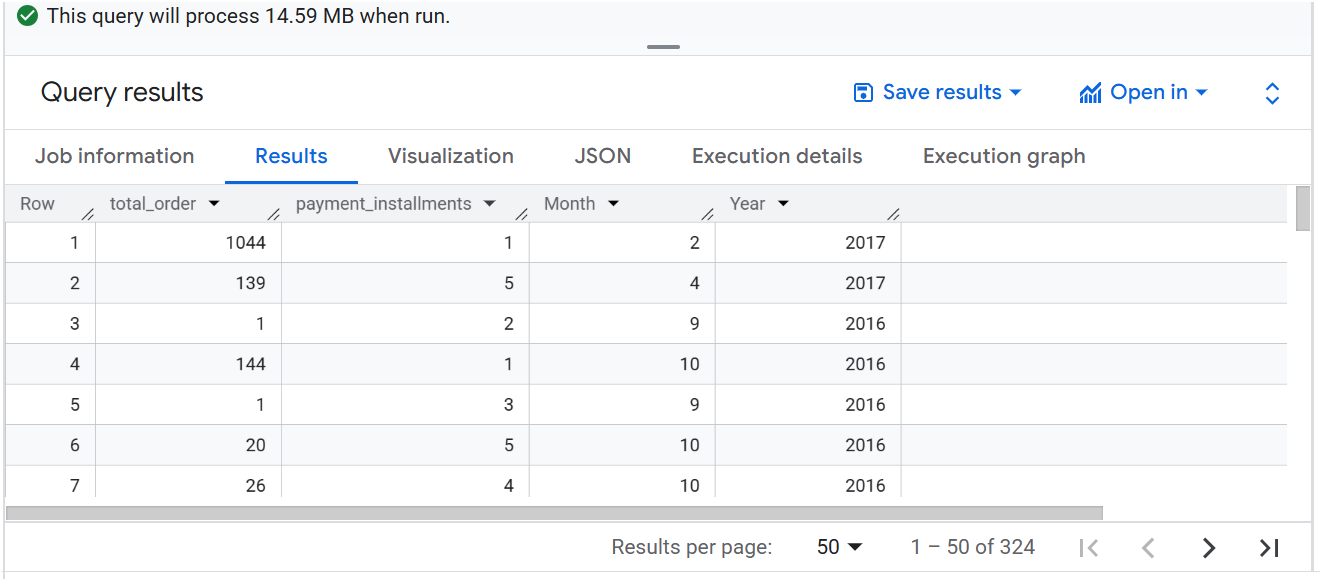

**Insight summary** for the installment-based payment:

* **Single installment (1x payment)** is by far the **most popular choice** — showing that the majority of customers prefer **paying in full upfront** rather than spreading payments.
* **2–3 installments** are the next most common, suggesting that a portion of customers opt for **short-term flexibility** in payments.
* Higher installments like **6, 8, 10, or even 11** are much less frequent, but their presence indicates that **installment-based purchasing is available and used for higher-value items**.
* Overall, the trend shows that while installments are an option, **Brazilian e-commerce buyers mainly prefer simplicity (one-time payment) with smaller groups using 2–3 installments for affordability**.




---



**C. Top 5 most used payment installments overall**

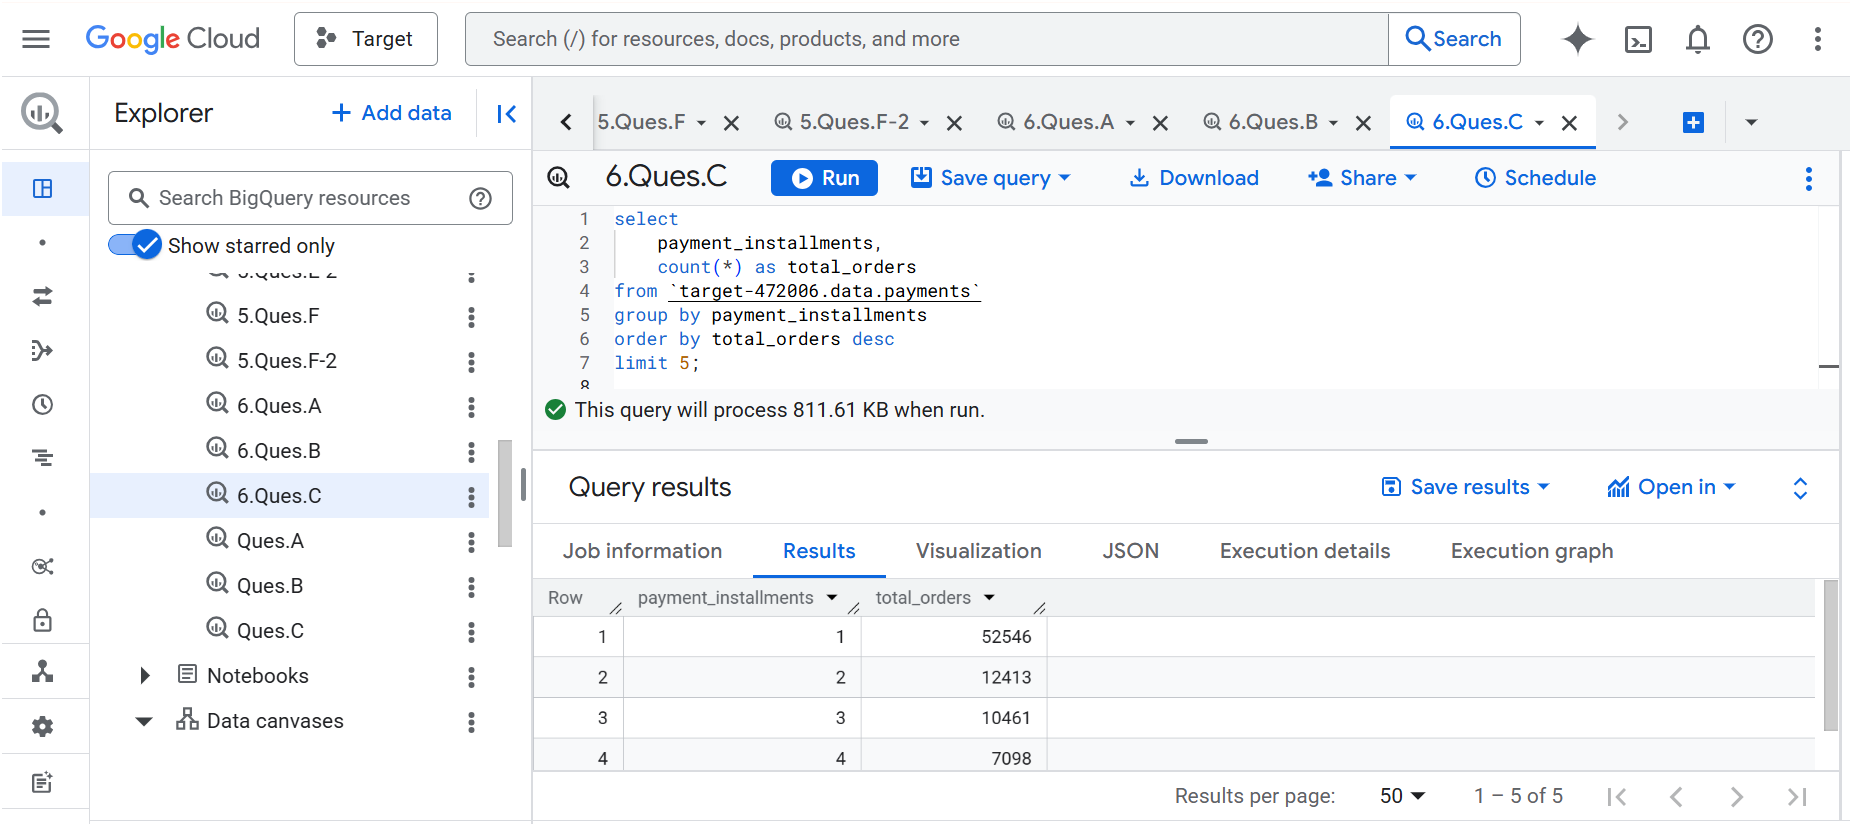


**Insight👇**

* **Single payment (1 installment)** dominates with **52,546 orders**, showing that **most customers prefer paying upfront**.
* **2–4 installments** are also common (12,413; 10,461; 7,098 orders), meaning many customers like splitting payments into small parts but still short-term.
* **10 installments** (5,328 orders) stands out as the most popular **long-term financing option**, suggesting customers use it for higher-value purchases.


👉 Overall, Brazilian e-commerce customers **overwhelmingly prefer full payments**, but there’s also a clear trend of using **2–4 small installments** and occasionally **10 installments** for expensive items.





---



---



# **Recommendation**



## 1) Logistics & Fulfillment (highest impact)

**Problem:** Long & variable delivery times, especially in northern/remote states; freight costs highly uneven; estimated delivery often inaccurate.

**Recommendations**

* **Improve ETA accuracy**: Recalibrate delivery-time models using historical actual vs. estimated delivery data; add postal-code / state-level features and carrier-specific corrections.


* **Regional fulfillment hubs / smart routing**: Place micro-fulfillment or partner hubs closer to high-latency regions (or use regional partners) to reduce delivery days and freight costs for northern states.

* **Dynamic freight/pricing & zone-based shipping fees**: Introduce zone-based or distance-based freight charges or promotions to offset unusually high shipping costs for remote states. Consider subsidized freight on high-margin items.

* **Exception handling & data quality checks**: Investigate extreme outliers (e.g., 100+ day delays) — likely cancellations, data errors, or exceptions. Fix ETL/data-entry issues and flag exceptions earlier.

---

## 2) Customer Experience & Operations

**Problem:** Customers shop mainly in evenings; satisfaction hinges on delivery and returns.
**Recommendations**

* **Targeted customer communications (timing + accuracy)**: Send promotions and cart reminders in the evening/night window (peak purchase times). Improve delivery notifications with more accurate ETAs.

* **Faster returns/refunds for remote regions**: Simplify return logistics for remote states to improve trust and repeat purchases.

* **Promote payment clarity at checkout**: Show installments & total cost clearly; highlight popular options (1x and 2–4x) and the top long-term option (10x) when eligible.

---

## 3) Pricing, Payment & Monetization

**Problem:** Strong growth in payment volume; installments usage concentrated in a few buckets.
**Recommendations**

* **Offer tailored financing options**: For high-value SKUs, promote the 10-installment option with transparent cost-of-credit messaging; for mid-range, emphasize 2–4 installments.

* **Dynamic promotions by region**: Use promotional budgets where freight is high or penetration is low to accelerate adoption (e.g., targeted vouchers in northern states).

---

## 4) Merchandising & Catalog Optimization

**Problem:** Sales concentrated in SP/RJ/MG; northern states low but higher mean price/freight (accessibility issue).
**Recommendations**

* **Region-aware assortment**: Prioritize SKUs with lower freight burden for remote states, and offer curated assortments that perform well net of freight.

* **Local supplier/seller partnerships**: Where feasible, source or partner with sellers closer to underserved states to lower freight and lead times.


---

## 5) Marketing & Growth

**Problem:** Growing e-commerce but seasonality and state pockets.
**Recommendations**

* **Seasonal plan & inventory**: Prepare for Nov (observed peak) and early-year spikes — scale marketing and inventory to avoid stockouts and heavy freight surges.

  * Demand-planning forecasts by SKU and state for Q3–Q4.

* **Geo-targeted acquisition**: Invest in high-ROI states (SP/RJ/MG) to grow share, while running low-cost expansion pilots in low-penetration states with freight-subsidized promos.


---

---


---


